In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
# Loading of the datasets
test_df = pd.read_csv("BigMart_Test.csv")
test_df["test"] = 1
train_df = pd.read_csv("BigMart_Train.csv")
train_df["test"] = 0

In [4]:
# Checking the dataset's shape. 
test_df.shape, train_df.shape

((5681, 12), (8523, 13))

In [13]:
#outlet_sales = train_df["Item_Outlet_Sales"]

#I do not need this here. We check for the shape, and then the head & tail 

In [6]:
train_df.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,NaN,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


In [6]:
train_df.tail().T

,8518,8519,8520,8521,8522
Item_Identifier,FDF22,FDS36,NCJ29,FDN46,DRG01
Item_Weight,6.865,8.38,10.6,7.21,14.8
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.0567834,0.0469824,0.0351863,0.145221,0.0448783
Item_Type,Snack Foods,Baking Goods,Health and Hygiene,Snack Foods,Soft Drinks
Item_MRP,214.522,108.157,85.1224,103.133,75.467
Outlet_Identifier,OUT013,OUT045,OUT035,OUT018,OUT046
Outlet_Establishment_Year,1987,2002,2004,2009,1997
Outlet_Size,High,NaN,Small,Medium,Small
Outlet_Location_Type,Tier 3,Tier 2,Tier 2,Tier 3,Tier 1


In [7]:
test_df.head().T

,0,1,2,3,4
Item_Identifier,FDW58,FDW14,NCN55,FDQ58,FDY38
Item_Weight,20.75,8.3,14.6,7.315,NaN
Item_Fat_Content,Low Fat,reg,Low Fat,Low Fat,Regular
Item_Visibility,0.00756484,0.0384277,0.0995749,0.0153884,0.118599
Item_Type,Snack Foods,Dairy,Others,Snack Foods,Dairy
Item_MRP,107.862,87.3198,241.754,155.034,234.23
Outlet_Identifier,OUT049,OUT017,OUT010,OUT017,OUT027
Outlet_Establishment_Year,1999,2007,1998,2007,1985
Outlet_Size,Medium,NaN,NaN,NaN,Medium
Outlet_Location_Type,Tier 1,Tier 2,Tier 3,Tier 2,Tier 3


In [8]:
test_df.tail().T

,5676,5677,5678,5679,5680
Item_Identifier,FDB58,FDD47,NCO17,FDJ26,FDU37
Item_Weight,10.5,7.6,10,15.3,9.5
Item_Fat_Content,Regular,Regular,Low Fat,Regular,Regular
Item_Visibility,0.0134965,0.142991,0.0735286,0,0.10472
Item_Type,Snack Foods,Starchy Foods,Health and Hygiene,Canned,Canned
Item_MRP,141.315,169.145,118.744,214.622,79.796
Outlet_Identifier,OUT046,OUT018,OUT045,OUT017,OUT045
Outlet_Establishment_Year,1997,2009,2002,2007,2002
Outlet_Size,Small,Medium,NaN,NaN,NaN
Outlet_Location_Type,Tier 1,Tier 3,Tier 2,Tier 2,Tier 2


### Initial Outlook of the data : 

- We have two types of features : item and outlet feautures. 
- There seems to de some descrepancies in Item fat content, should check that out. 
- Item Visibility is 0 for some elements. This is not possible. Should check that out. 
- Some missing values in Outlet Size. 

In [5]:
# Both the train and the test data is similar. We can now try concatenating the same. 
# All feature engineering process will be done on the combined set, and then they will be 
# separated again to get the desired results. 
test_df["Item_Outlet_Sales"] = np.nan
bigmart_df = pd.concat([train_df, test_df], sort = False).reset_index().drop(["index"], axis = 1)

In [6]:
print(bigmart_df.shape) # Checking the shape of the combined df, to see if our merging was okay. 

(14204, 13)


In [7]:
bigmart_df.tail().T

,14199,14200,14201,14202,14203
Item_Identifier,FDB58,FDD47,NCO17,FDJ26,FDU37
Item_Weight,10.5,7.6,10,15.3,9.5
Item_Fat_Content,Regular,Regular,Low Fat,Regular,Regular
Item_Visibility,0.0134965,0.142991,0.0735286,0,0.10472
Item_Type,Snack Foods,Starchy Foods,Health and Hygiene,Canned,Canned
Item_MRP,141.315,169.145,118.744,214.622,79.796
Outlet_Identifier,OUT046,OUT018,OUT045,OUT017,OUT045
Outlet_Establishment_Year,1997,2009,2002,2007,2002
Outlet_Size,Small,Medium,NaN,NaN,NaN
Outlet_Location_Type,Tier 1,Tier 3,Tier 2,Tier 2,Tier 2


In [8]:
bigmart_df.info()
# Checking the info to identify all the feautures and dtypes. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
test                         14204 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 1.4+ MB


### Observations : 

- Item weight and outlet size has null values. 
- There are 7 obj dtypes, which need to be changed and altered. 

In [9]:
# Selecting only the object column names : 
obj = bigmart_df.select_dtypes(include = [object]).columns.tolist()
obj

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
bigmart_df.describe(include = ["object"]).T

,count,unique,top,freq
Item_Identifier,14204,1559,FDH32,10
Item_Fat_Content,14204,5,Low Fat,8485
Item_Type,14204,16,Fruits and Vegetables,2013
Outlet_Identifier,14204,10,OUT027,1559
Outlet_Size,10188,3,Medium,4655
Outlet_Location_Type,14204,3,Tier 3,5583
Outlet_Type,14204,4,Supermarket Type1,9294


In [11]:
bigmart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800
test,14204.0,0.399958,0.489907,0.000,0.000000,0.000000,1.000000,1.000000


In [12]:
for i in obj[1:] : 
    print("\n", i)
    print(bigmart_df[i].unique())


 Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

 Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

 Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

 Outlet_Size
['Medium' nan 'High' 'Small']

 Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']

 Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [13]:
bigmart_df.Item_Fat_Content.replace("reg", "Regular", inplace = True)
bigmart_df.Item_Fat_Content.replace(["LF","low fat"], "Low Fat", inplace = True)

In [14]:
bigmart_df.Item_Visibility.replace(0, np.nan, inplace = True)
bigmart_df.Item_Visibility.isna().sum()

879

# Univariate Analysis 

In [15]:
def count_plot (df, colname) : 
    plt.figure(figsize = (16,6))
    ser = df[colname].value_counts()
    ax = sns.countplot(y =  df[colname], order = ser.index)
    ax.set(xlabel = 'count', ylabel = colname)
    labels = [str(round(x/14204*100, 2))+"%" for x in ser.values]
    rects = ax.patches
    for rect, label in zip(rects, labels) : 
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height()/2
        space = 5
        ha = 'left'
        plt.annotate(label, (x_value,y_value), xytext = (space, 0), textcoords = "offset points", va = 'center', ha = ha)
    plt.title(colname, fontsize = 30)
    s = colname + " countplot.jpg"
    plt.savefig(s)
    plt.show()

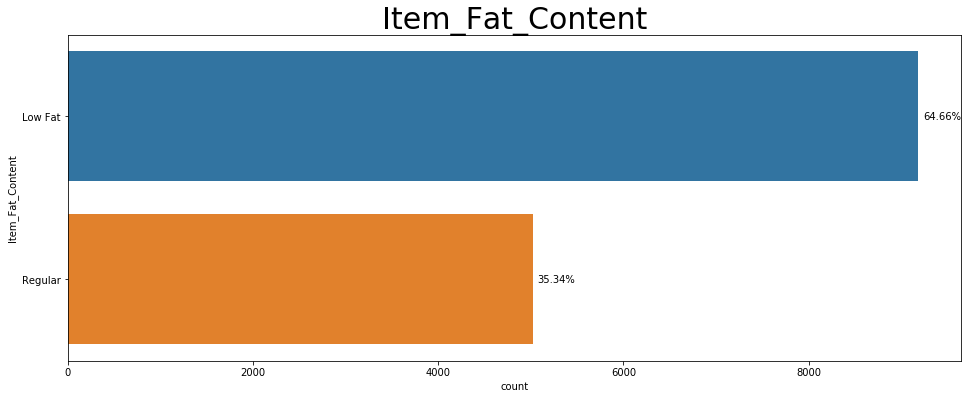

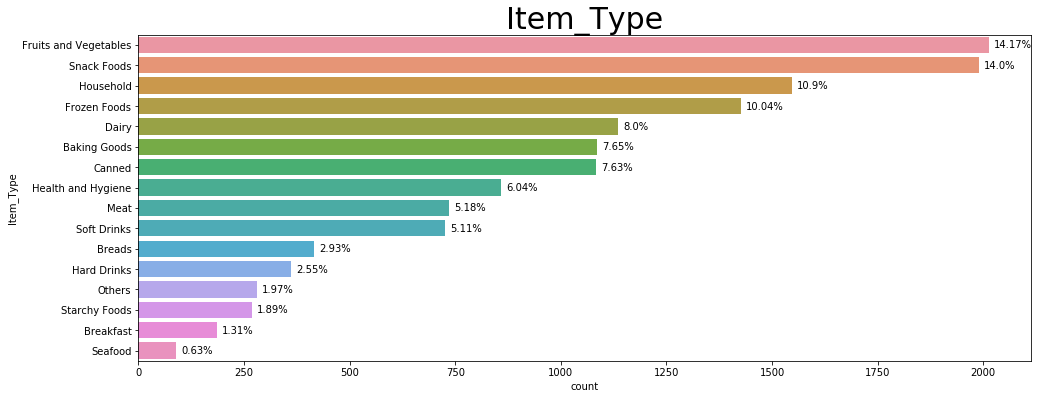

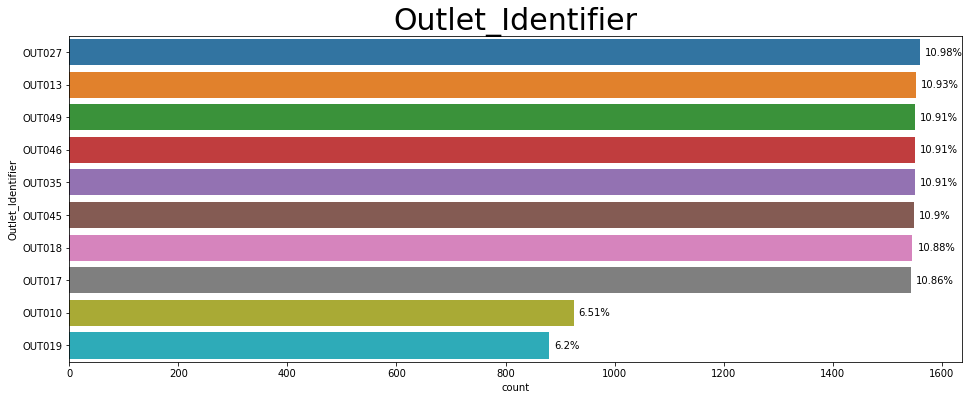

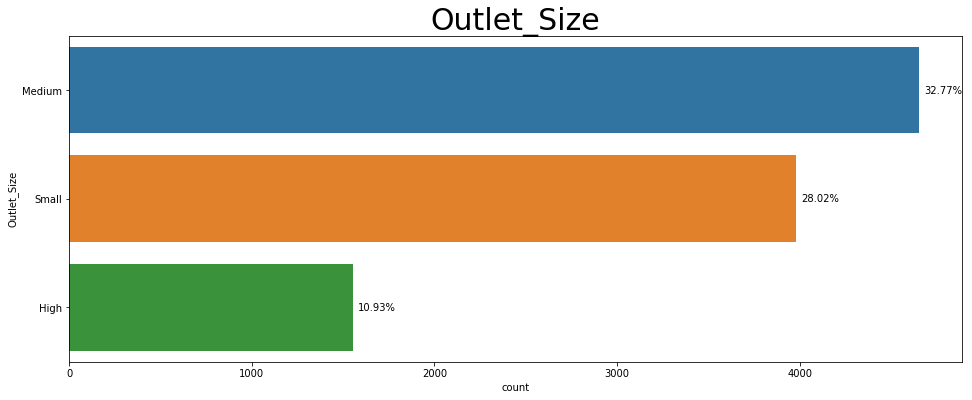

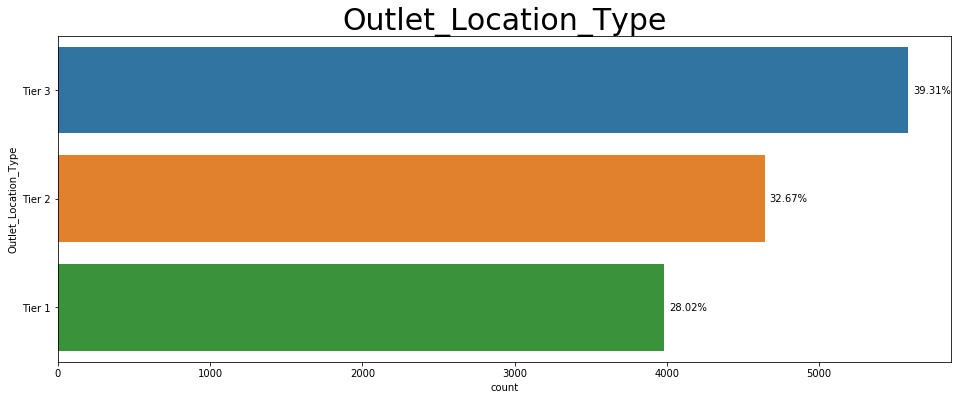

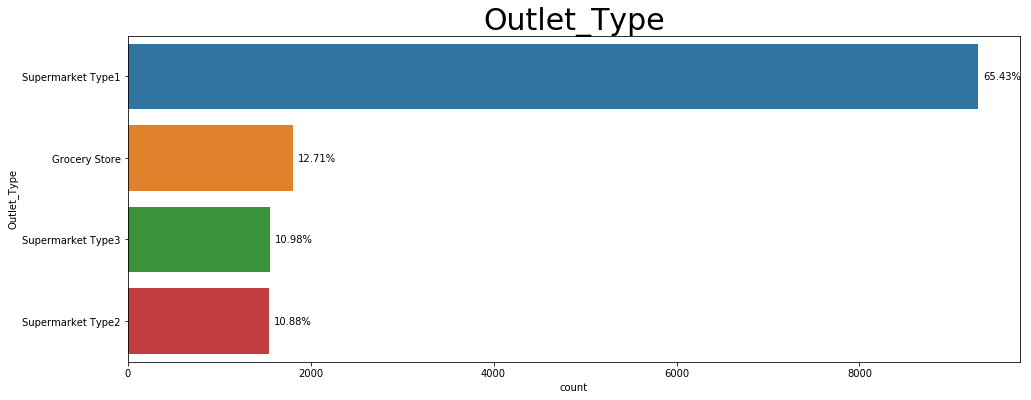

In [16]:
for i in  obj[1:] : 
    count_plot(bigmart_df, i)

In [17]:
def dist_plot(df, i) : 
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 0.8)}, figsize = (16,8))
    
    mean=df[i].mean()
    median=df[i].median()
    mode=df[i].mode().get_values()[0]
    
    sns.boxplot(df[i].dropna(), ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.axvline(mode, color='b', linestyle='-')
    
    sns.distplot(df[i].dropna(), kde = False, color= 'purple', ax = ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    ax_hist.axvline(mode, color='b', linestyle='-')
    
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
    ax_box.set(xlabel='')
    plt.title(i, fontsize = 30)
    s = i + " distplot.jpg"
    plt.savefig(s)
    plt.show()

In [18]:
num = bigmart_df.select_dtypes(exclude = [object]).columns.tolist()
num = num[:-1] #removing test
num

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

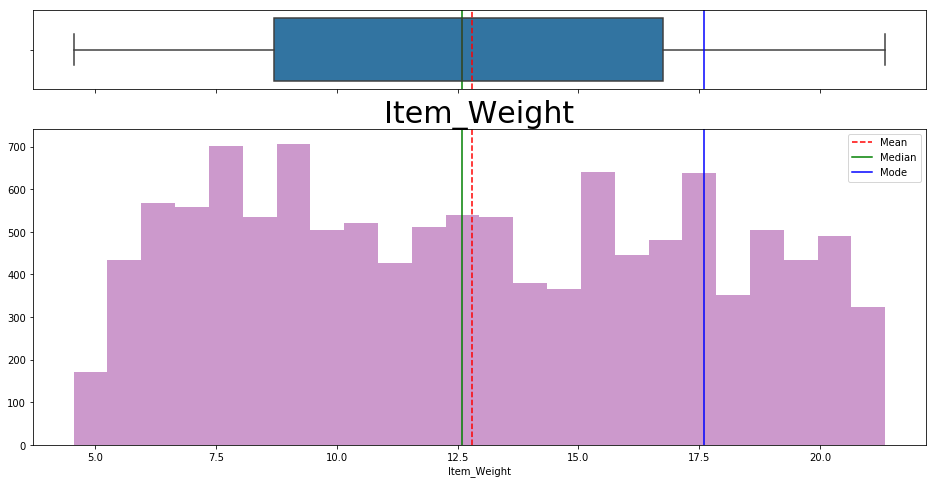

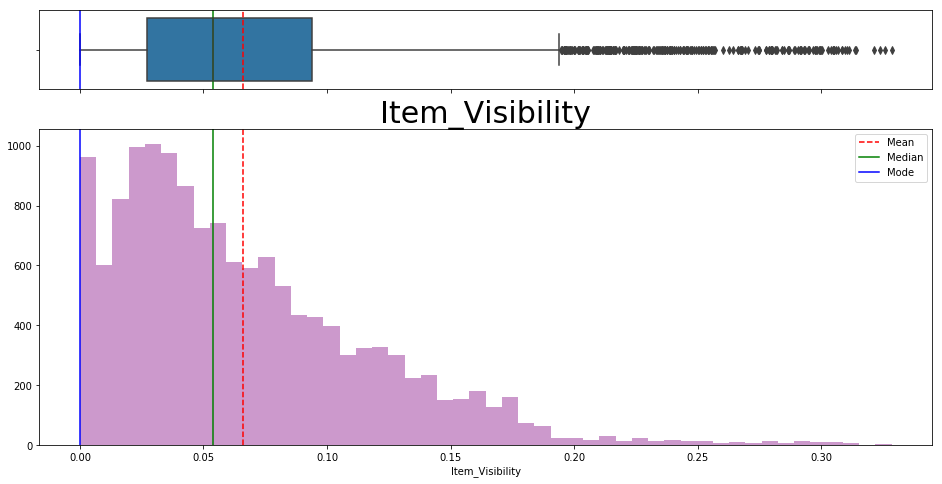

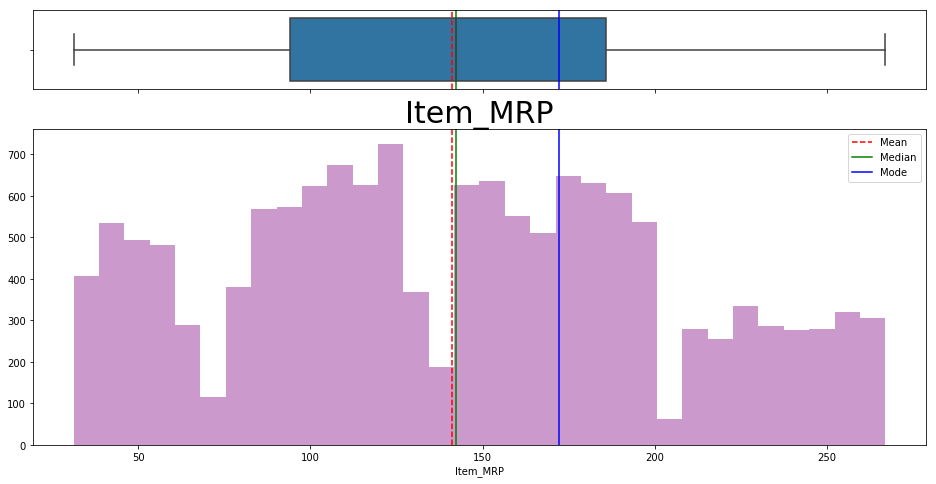

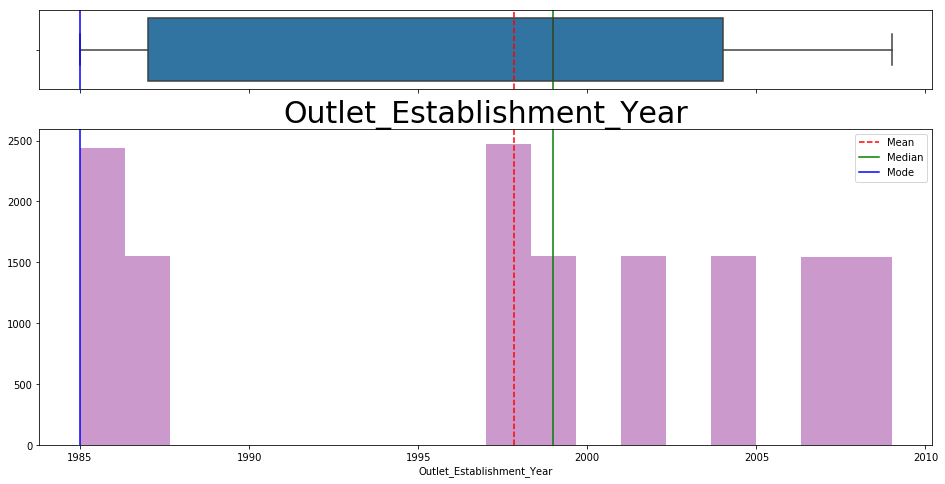

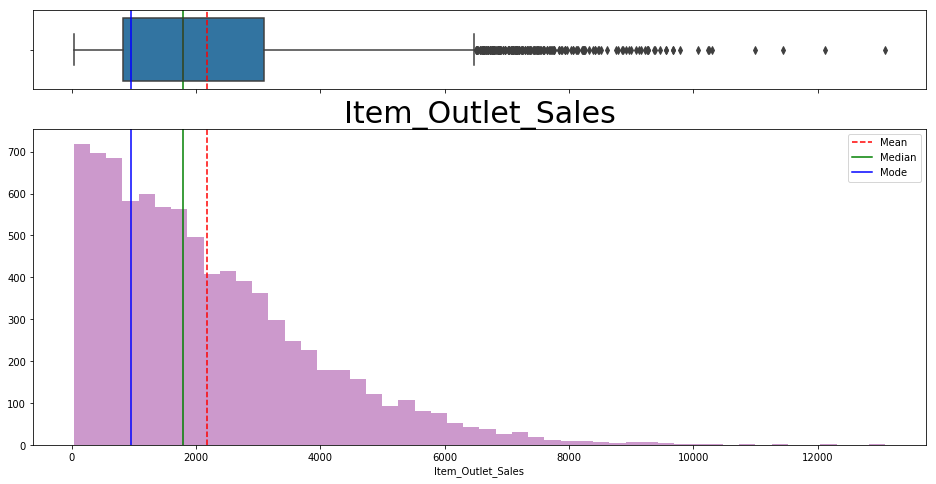

In [15]:
for i in  num : 
    dist_plot(bigmart_df, i)

In [19]:
for i in num : 
    print(i)
    print(bigmart_df[i].skew())
    print()

Item_Weight
0.10130935278560388

Item_Visibility
1.2640004844236492

Item_MRP
0.13072836040225863

Outlet_Establishment_Year
-0.39646519008637443

Item_Outlet_Sales
1.1775306028542798



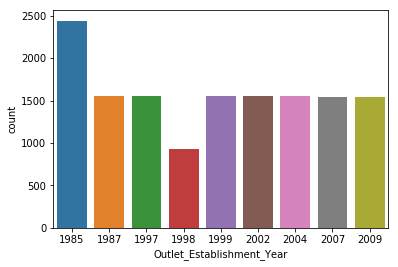

In [405]:
sns.countplot(bigmart_df["Outlet_Establishment_Year"].astype("object"))

#### Inferences : 

- We see that item visibility and item outlet sales are right skewed
- Outlet Establishment Year should actually be a categorical variable
- We can also feature engineer establishment year, to age as that is more useful for us 
- Item weight and Item Visibility have missing values
- Our target variable is right skewed, we need to see what can be done to make it look better. 

## Transforming item visibility and item outlet sales : 

In [20]:
def rt_skew_transform(df, colname, met) : 
    cbrt = lambda x : x**(1/3)
    s = met + "_" + colname
    met_name = ['sqrt', 'log', 'cbrt']
    met_func = [np.sqrt, np.log2, cbrt ]
    met_dic = dict(zip(met_name, met_func))
    df[s] = df[colname].apply(met_dic[met])
    dist_plot(df,s)
    print("The total skew is : ", df[s].skew())
    return (s,df[s].skew())
        

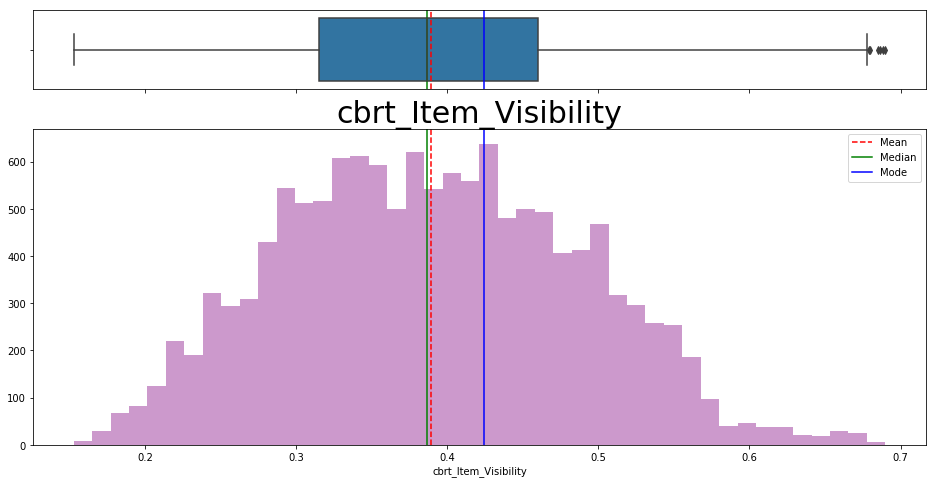

The total skew is :  0.14797900453565402
cbrt_Item_Visibility
0.14797900453565402


In [406]:
s, skew = rt_skew_transform(bigmart_df, "Item_Visibility", 'cbrt')
print(s)
print(skew)

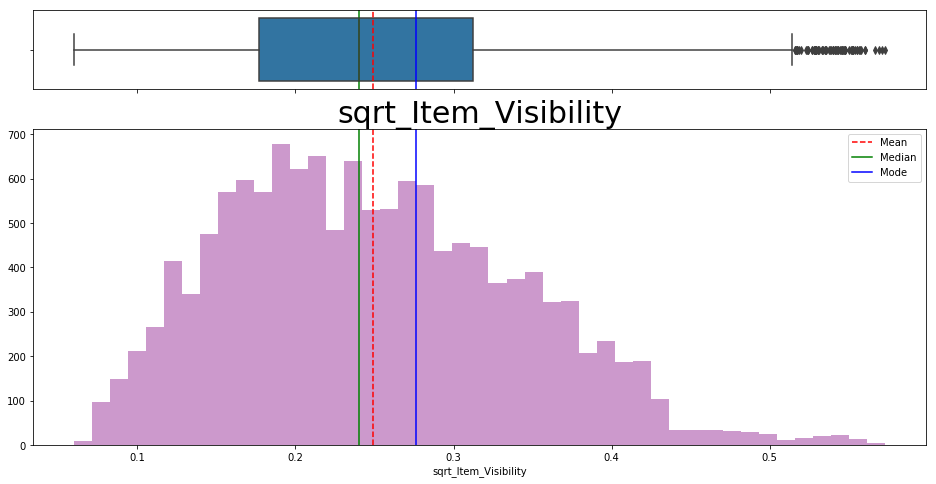

The total skew is :  0.42083886298282724


In [21]:
sqr, sqrt_skew = rt_skew_transform(bigmart_df, "Item_Visibility", 'sqrt')
#print(sqrt_skew)

In [86]:
# We are keeping the sqrt one, as it is more normal shaped than cube root. 
bigmart_df.drop([s], axis = 1, inplace = True)

In [408]:
bigmart_df.drop(["cbrt_Item_Visibility"], axis = 1, inplace = True)

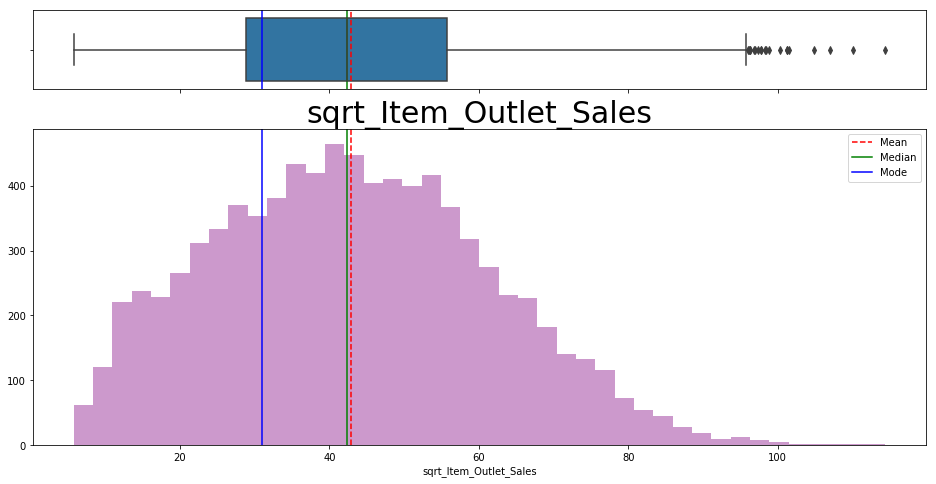

The total skew is :  0.23467599347099255


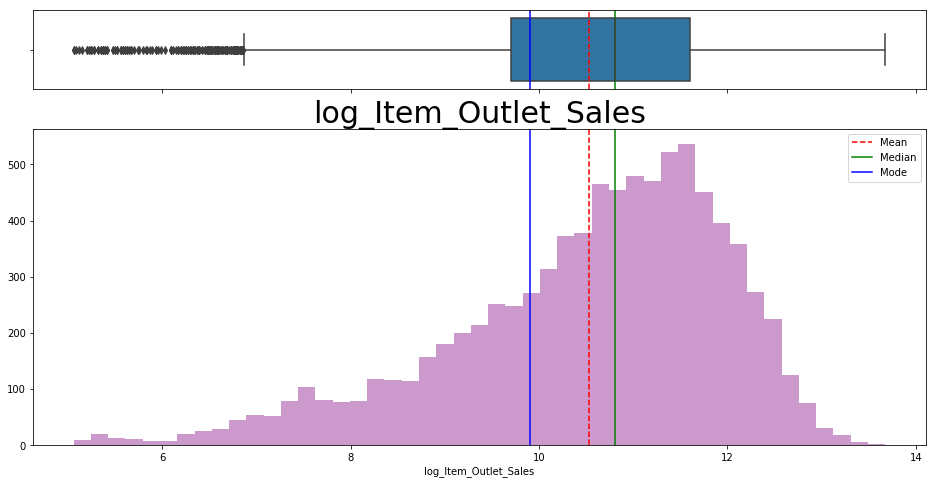

The total skew is :  -0.8877533432093007


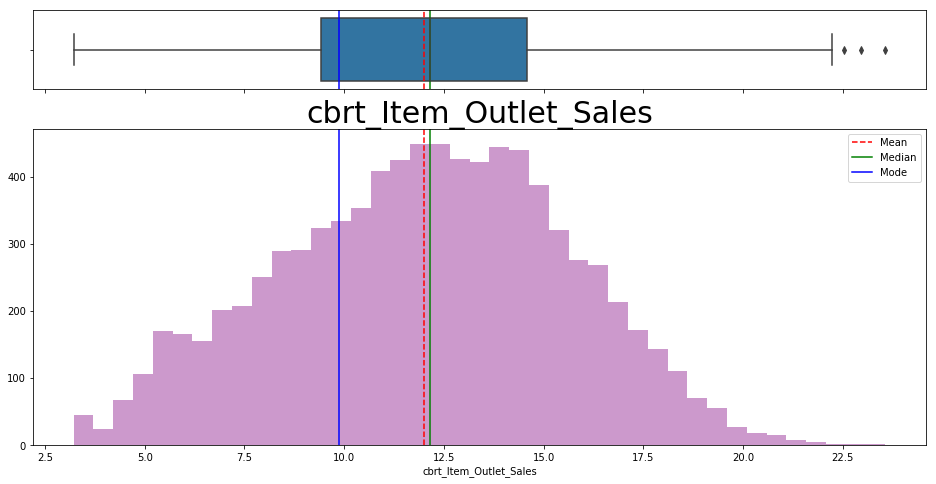

The total skew is :  -0.10250699736722885


In [22]:
mets = ['sqrt', 'log', 'cbrt']
col, skew_val = [], []
for i in mets : 
    c, s = rt_skew_transform(bigmart_df, "Item_Outlet_Sales", i)
    col.append(c)
    skew_val.append(abs(s))
my_dic = dict(zip(col, skew_val))

In [23]:
a = min(my_dic)
del my_dic[a]

In [24]:
for k in my_dic.keys() : 
    print(k)
    bigmart_df.drop([k], axis = 1, inplace = True)

sqrt_Item_Outlet_Sales
log_Item_Outlet_Sales


In [25]:
bigmart_df.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.0160473,0.0192782,0.0167601,NaN,NaN
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,NaN,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


In [96]:
## Bi Variate Analysis : 

In [26]:
def box_plot(df, colname, feature, orient) : 
    if orient == 'h':
        plt.figure(figsize = (16,6))
        sns.boxplot(x = feature, y = colname , data = df)
        s = colname + " wrt " + feature
        plt.title(s, fontsize = 30)
        s = s + ".jpg"
        plt.savefig(s)
        plt.show()
    elif orient == 'v':
        plt.figure(figsize = (16,6))
        sns.boxplot(y = feature, x = colname , data = df)
        s = colname + " wrt " + feature
        plt.title(s, fontsize = 30)
        s = s + ".jpg"
        plt.savefig(s)
        plt.show()

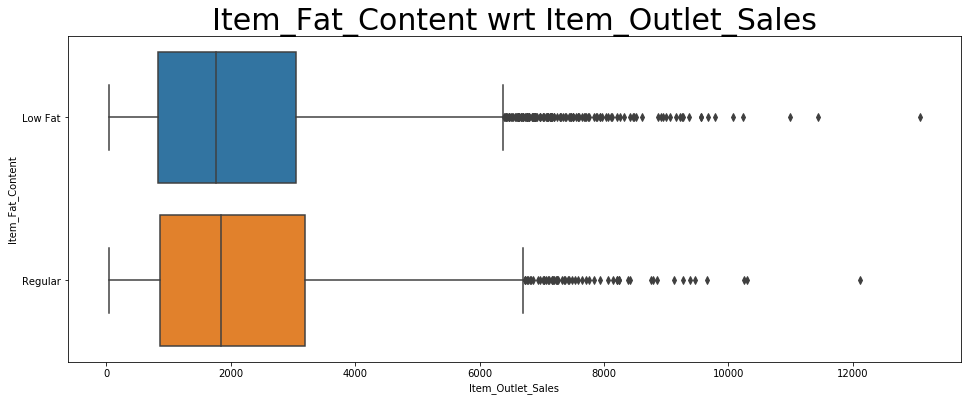

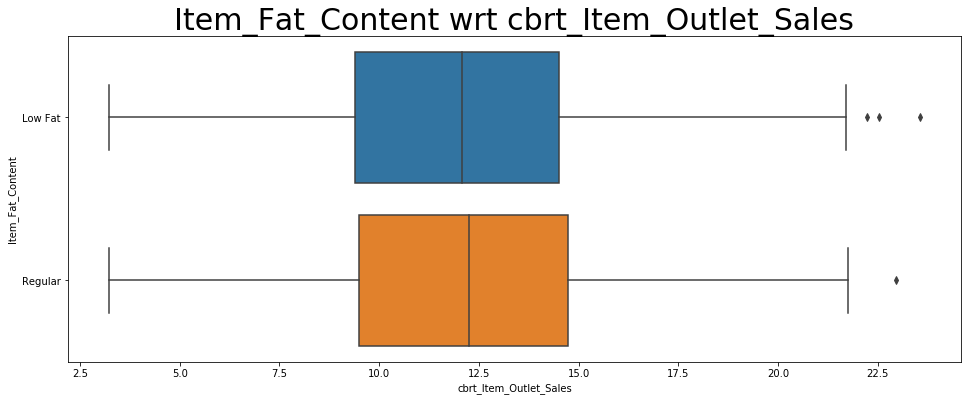

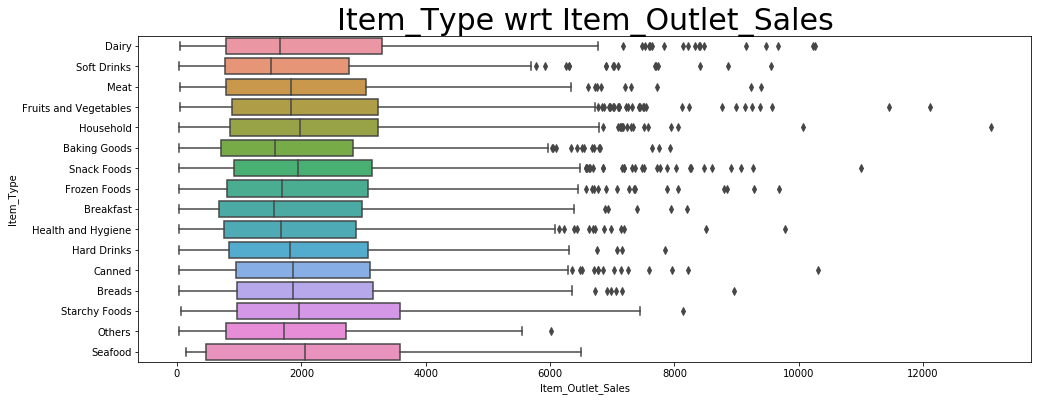

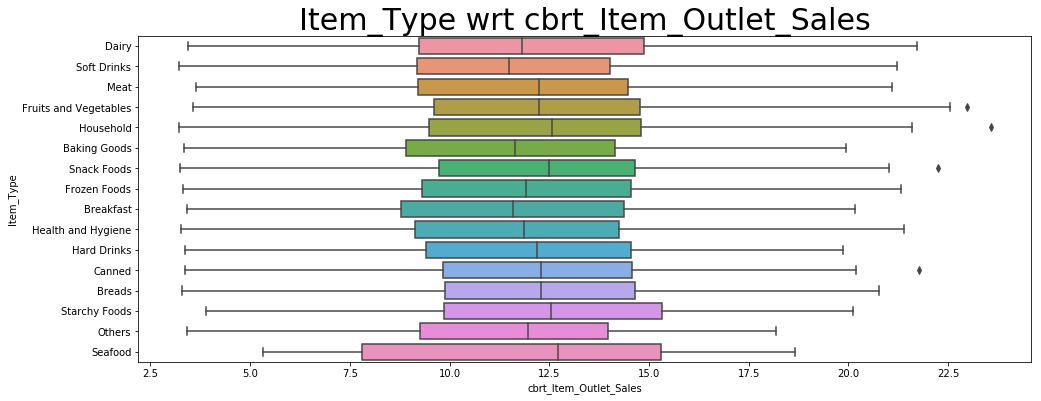

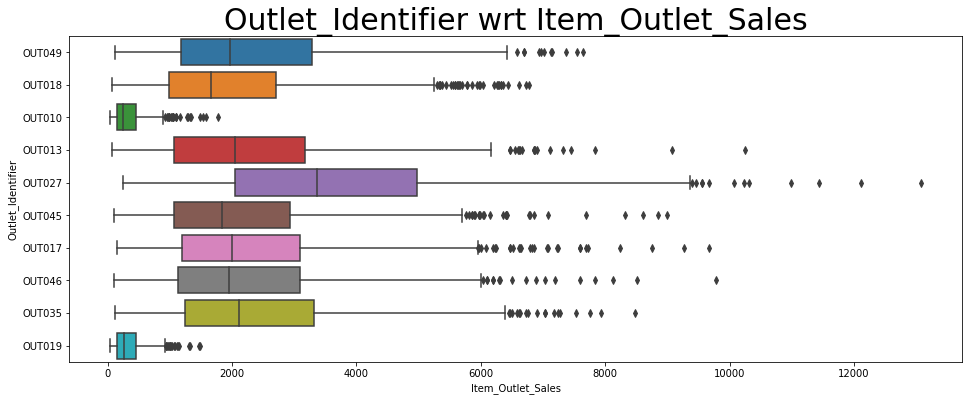

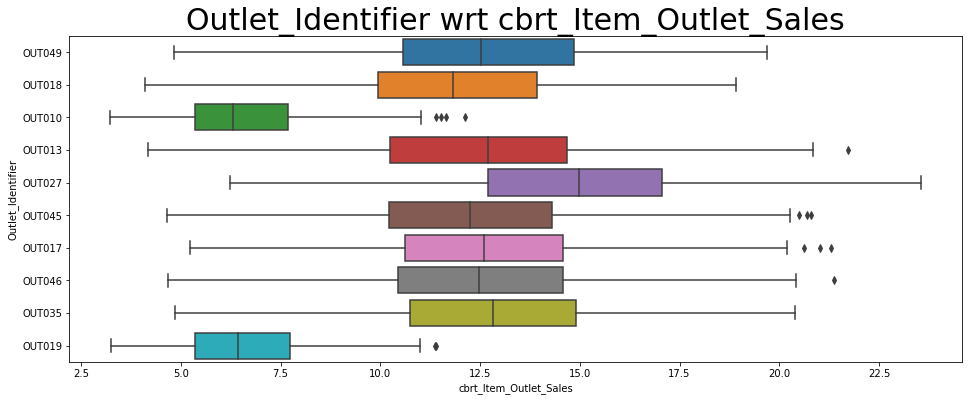

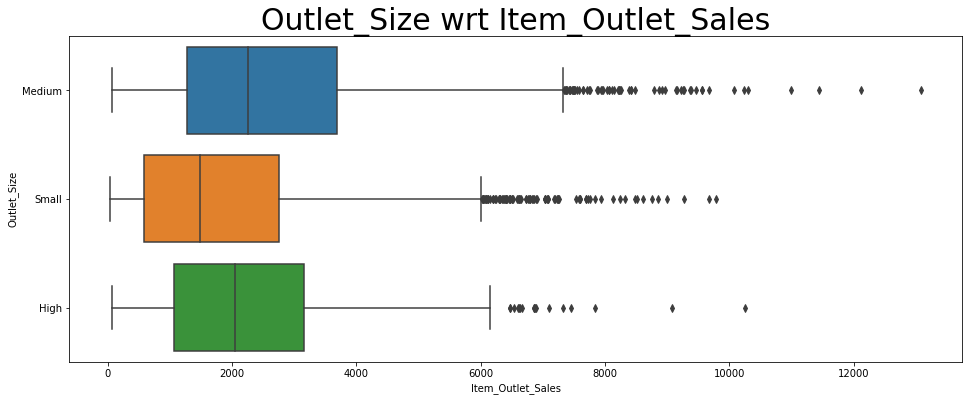

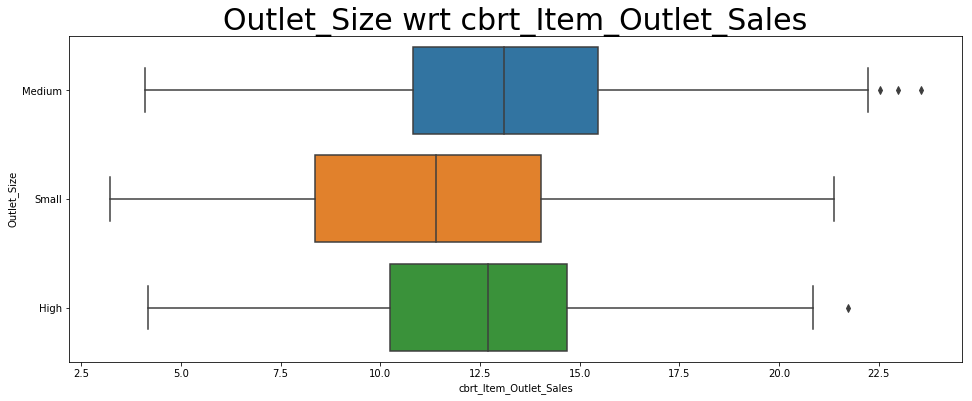

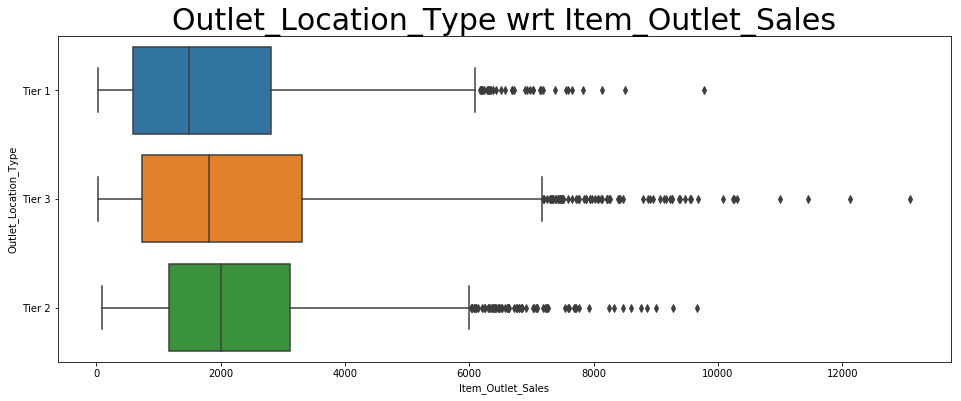

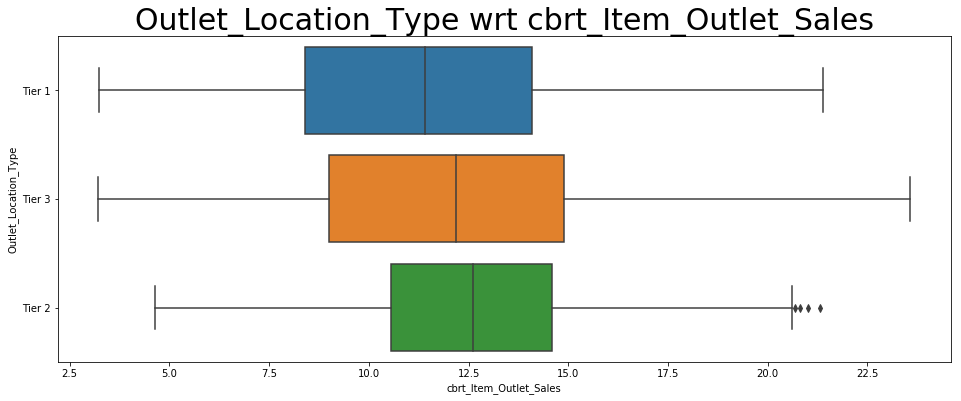

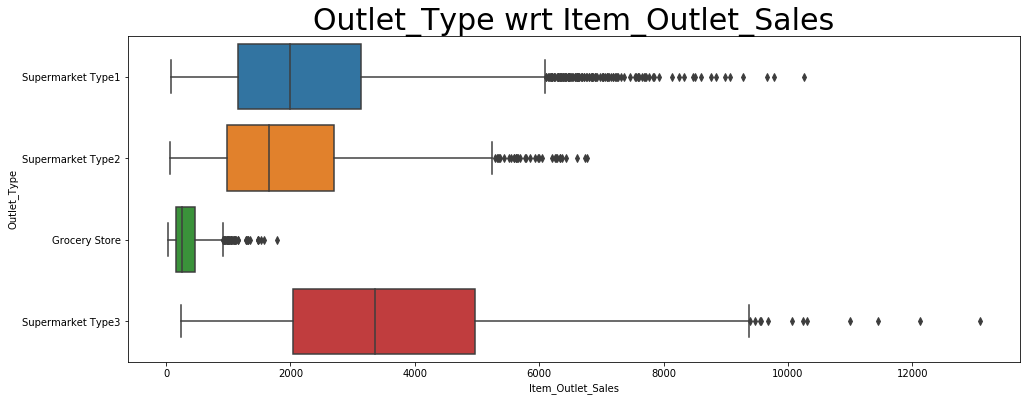

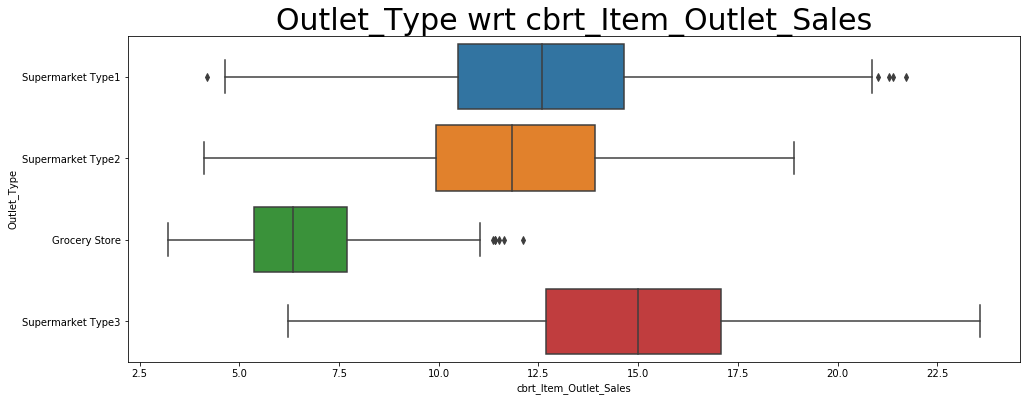

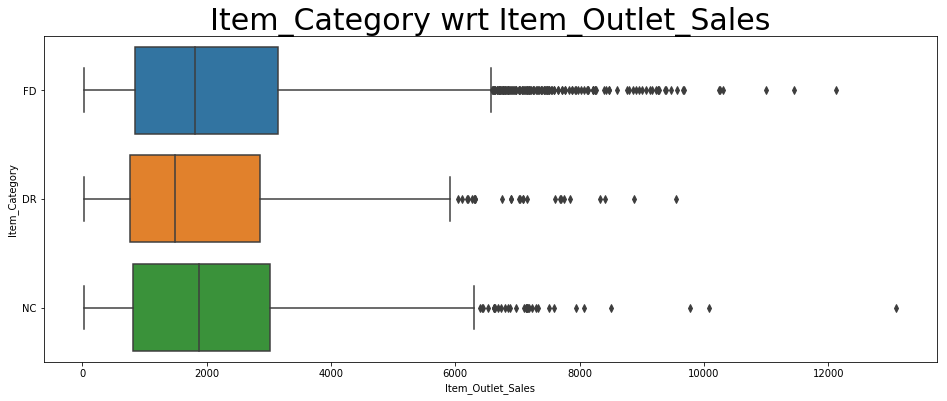

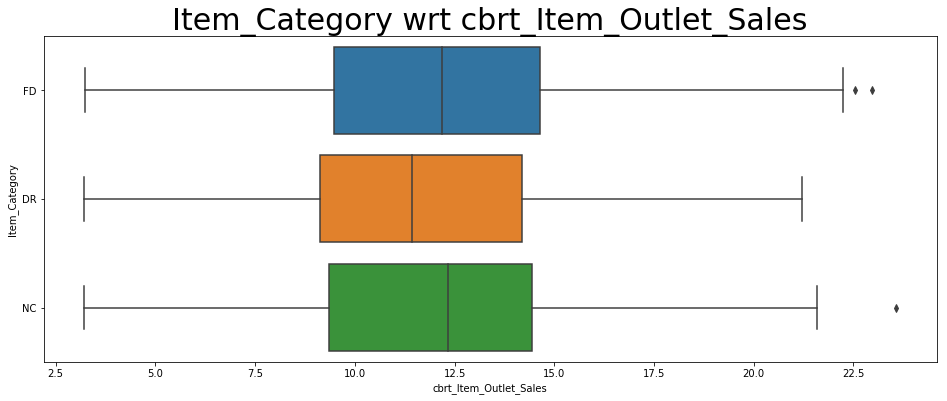

In [79]:
for colname in obj[1:] : 
    n_itr = iter(["Item_Outlet_Sales", "cbrt_Item_Outlet_Sales"])
    box_plot(bigmart_df, colname, next(n_itr), 'h')
    box_plot(bigmart_df, colname, next(n_itr), 'h')

In [27]:
def scatter_plot(df, xaxis, yaxis) :
    f, ax = plt.subplots(figsize = (16,8))
    plt.scatter(x = df[xaxis], y = df[yaxis])
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    s = yaxis + " wrt " + xaxis
    plt.title(s, fontsize = 30)
    plt.savefig(s + ".jpg")
    plt.show()

In [28]:
num.remove("Item_Outlet_Sales")

In [29]:
num

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

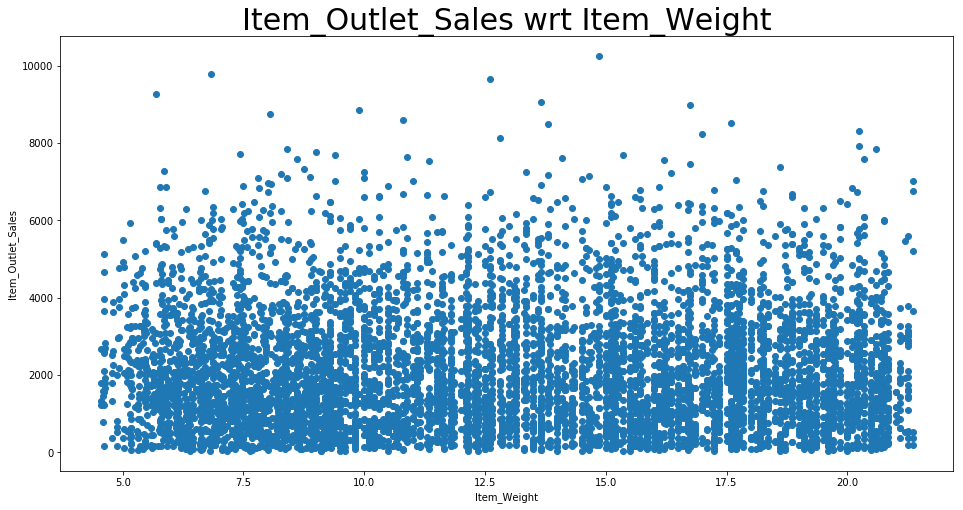

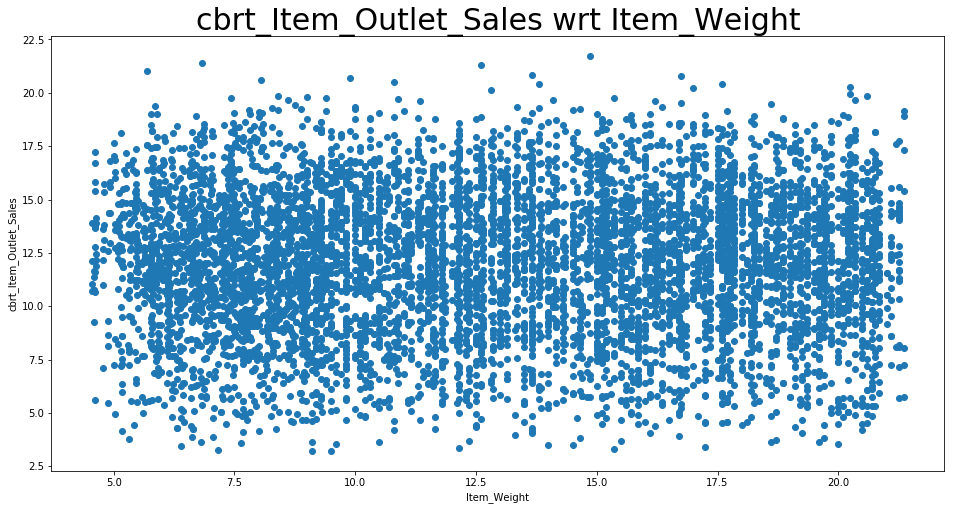

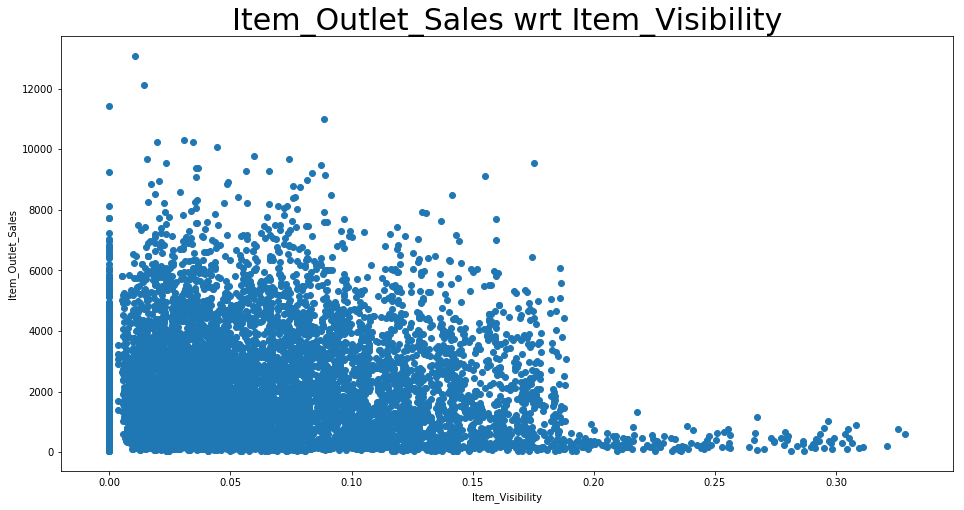

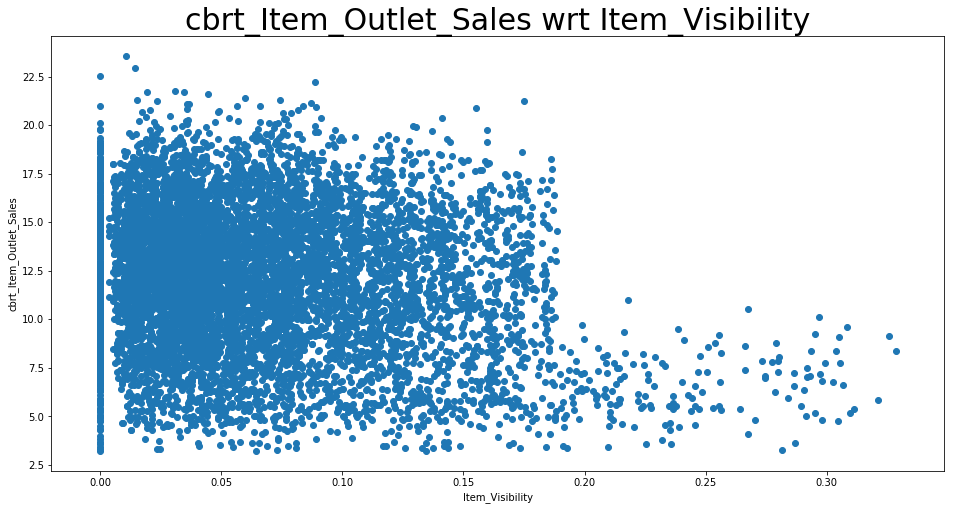

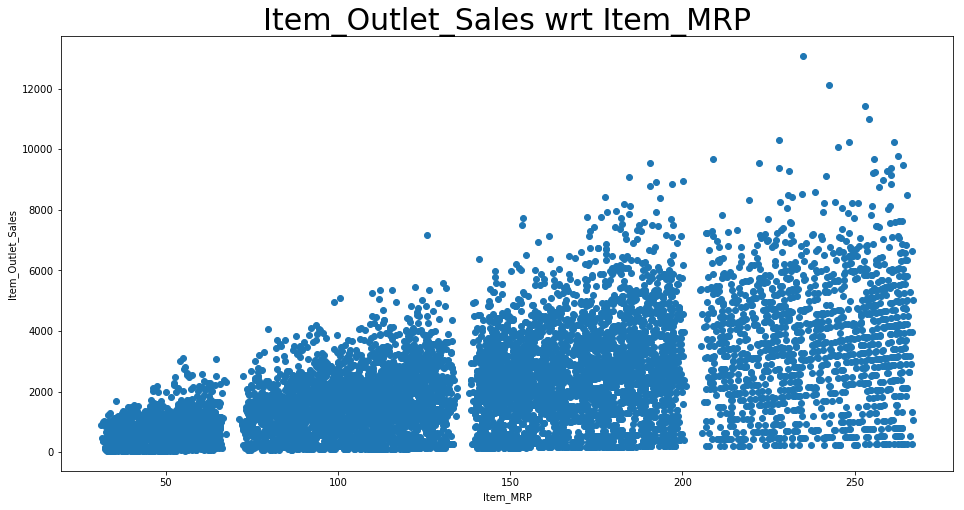

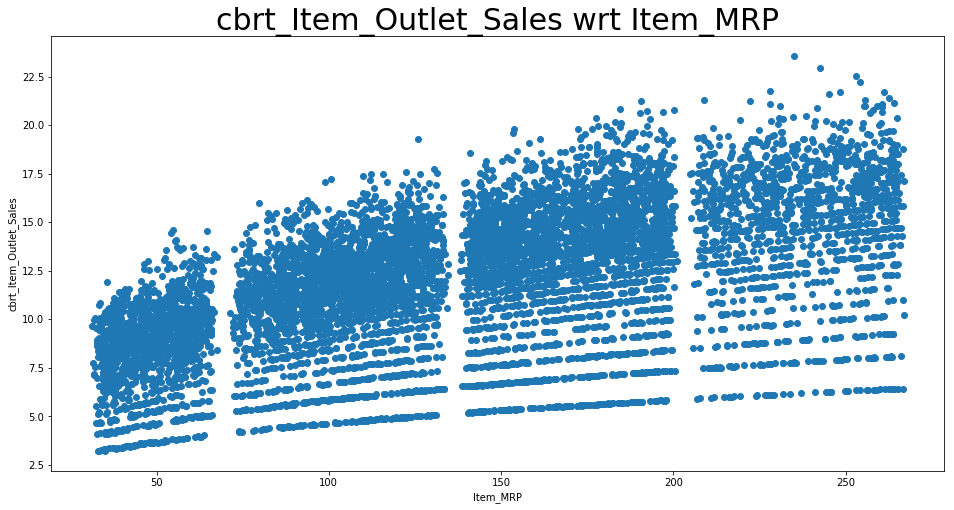

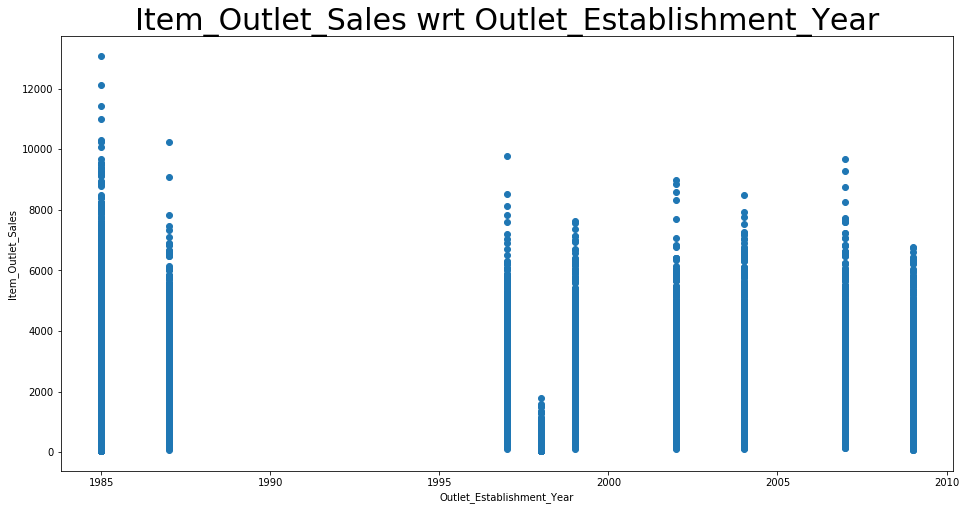

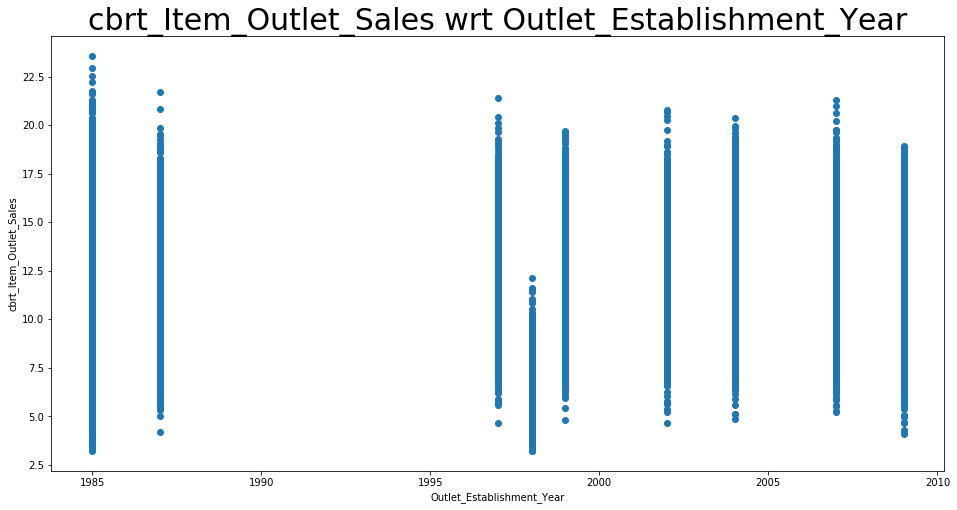

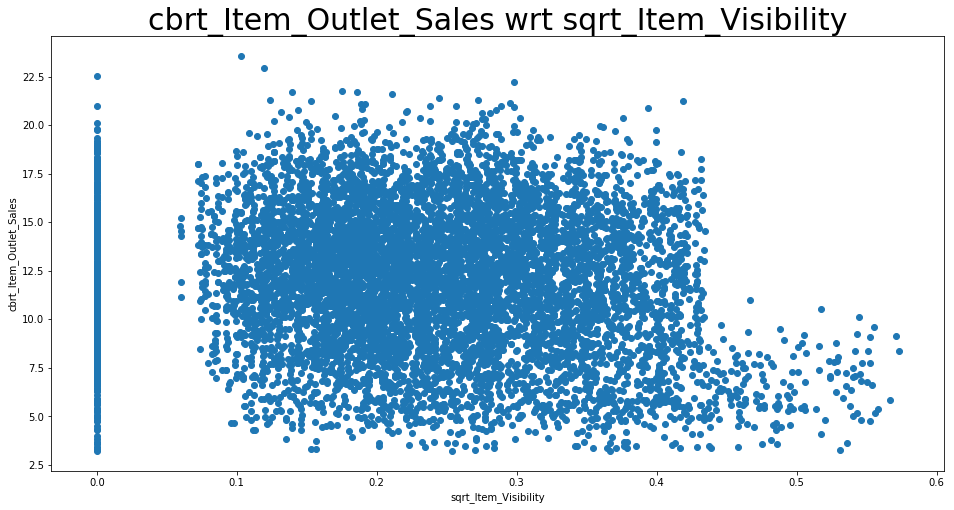

In [123]:
for i in num : 
    n_itr = iter(["Item_Outlet_Sales", "cbrt_Item_Outlet_Sales"])
    scatter_plot(bigmart_df, i, next(n_itr))
    scatter_plot(bigmart_df, i, next(n_itr))
scatter_plot(bigmart_df, "sqrt_Item_Visibility", "cbrt_Item_Outlet_Sales")

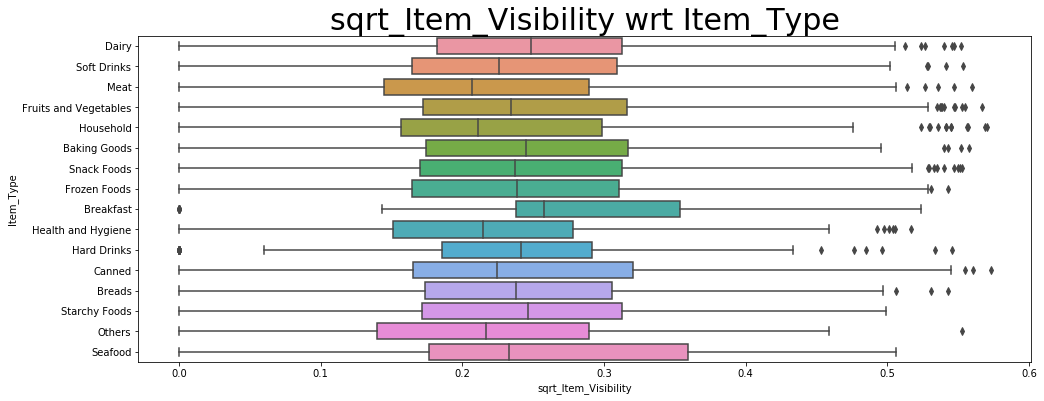

In [126]:
box_plot(bigmart_df, "sqrt_Item_Visibility", "Item_Type", 'v')

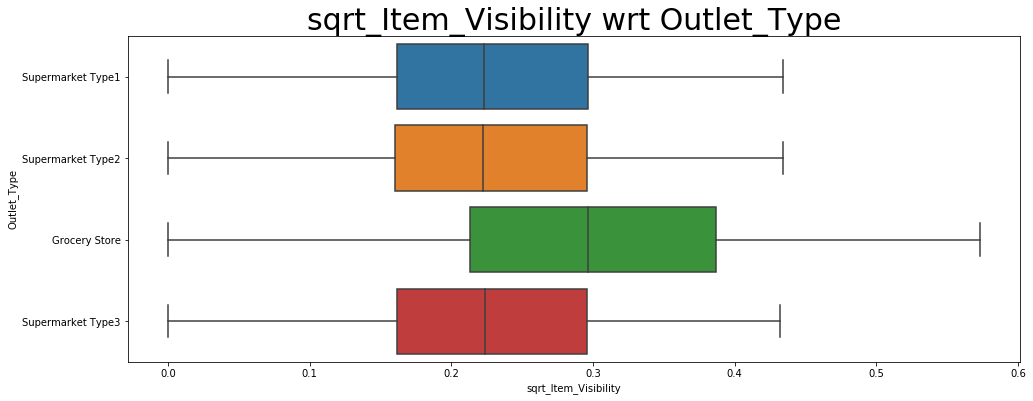

In [127]:
box_plot(bigmart_df, "sqrt_Item_Visibility", "Outlet_Type", 'v')

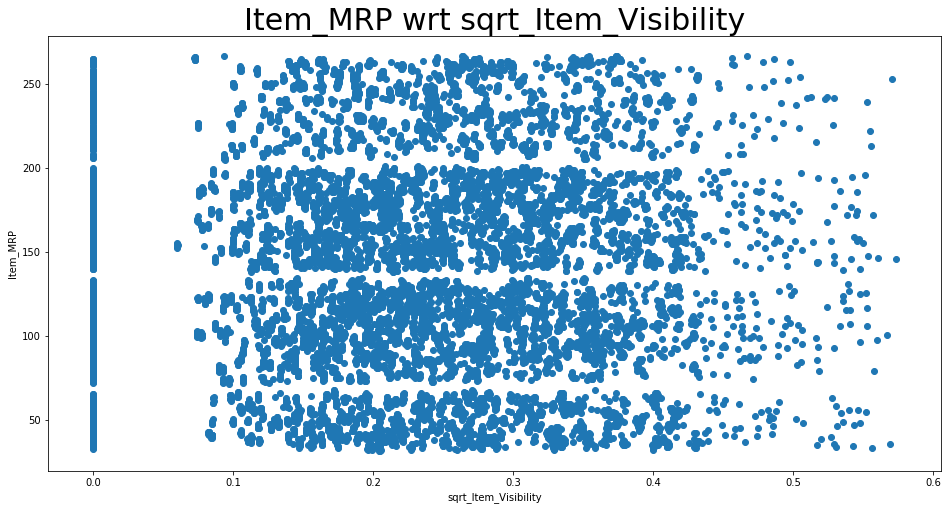

In [129]:
scatter_plot(bigmart_df, "sqrt_Item_Visibility", "Item_MRP")

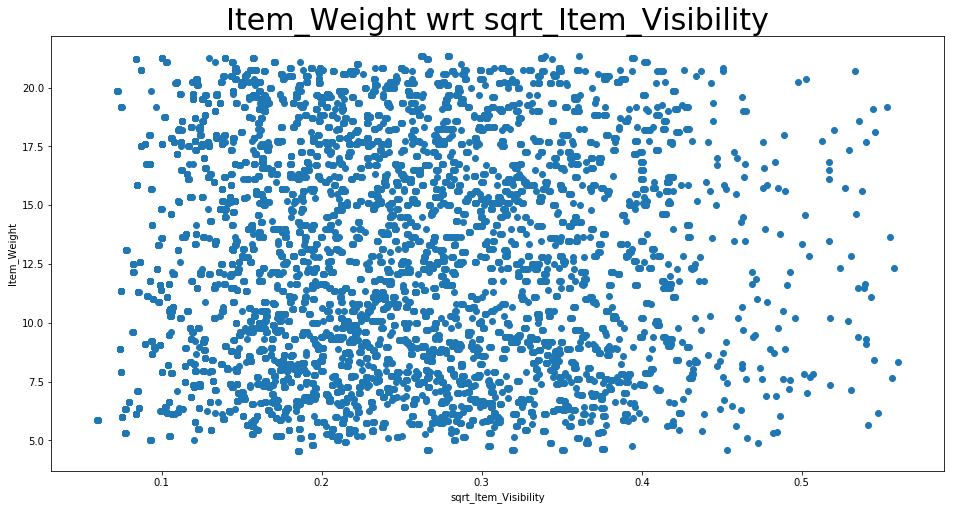

In [416]:
scatter_plot(bigmart_df, "sqrt_Item_Visibility", "Item_Weight")

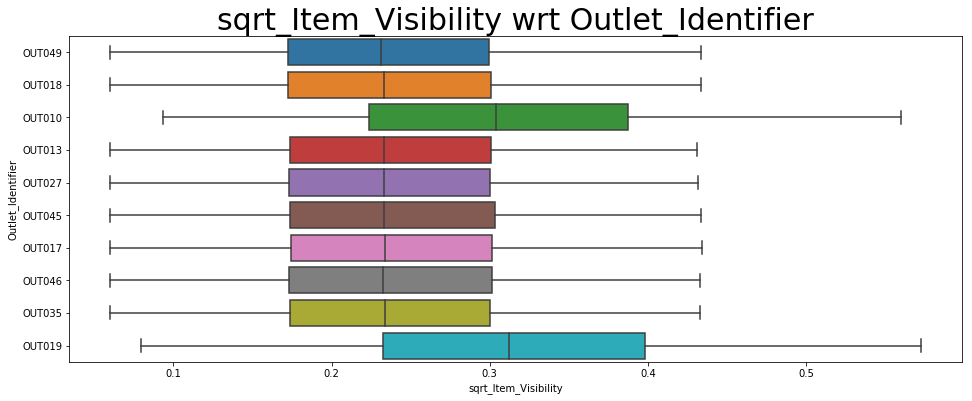

In [424]:
box_plot(bigmart_df, "sqrt_Item_Visibility", "Outlet_Identifier", 'v')

## Treating Missing Values

In [32]:
bigmart_df.groupby(["Outlet_Identifier"])["Item_Weight", "Outlet_Size", "Item_Visibility"].count()

,Item_Weight,Outlet_Size,Item_Visibility
Outlet_Identifier,,,
OUT010,925,0,872
OUT013,1553,1553,1455
OUT017,1543,0,1459
OUT018,1546,1546,1443
OUT019,0,880,830
OUT027,0,1559,1463
OUT035,1550,1550,1458
OUT045,1548,0,1455
OUT046,1550,1550,1452


This indicates to us, that the Item Weight and Outlet Size values, which were missing, had to do with the fact that these values were missing for specific outlets. 

We will try to be as accurate as possible in filling these missing values. 

## Filling Missing Outlet Sizes : 



In [24]:
bigmart_df[bigmart_df["Outlet_Identifier"].isin(["OUT010", "OUT017", "OUT045"])]\
    .groupby(["Outlet_Identifier","Outlet_Type", "Outlet_Location_Type"])\
        ["Item_Identifier"].count()

Outlet_Identifier  Outlet_Type        Outlet_Location_Type
OUT010             Grocery Store      Tier 3                   925
OUT017             Supermarket Type1  Tier 2                  1543
OUT045             Supermarket Type1  Tier 2                  1548
Name: Item_Identifier, dtype: int64

From this, we have identified that : 

- Outlet 10 is a grocery store, located in Tier 3
- Outlet 17 is a Supermarket Type1 located in Tier 2
- Outlet 45 is similar to Outlet 17. 

In [25]:
pd.crosstab([bigmart_df["Outlet_Type"], bigmart_df.Outlet_Location_Type], \
           [bigmart_df.Outlet_Size])

Outlet_Size                             High  Medium  Small
Outlet_Type       Outlet_Location_Type                     
Grocery Store     Tier 1                   0       0    880
Supermarket Type1 Tier 1                   0    1550   1550
                  Tier 2                   0       0   1550
                  Tier 3                1553       0      0
Supermarket Type2 Tier 3                   0    1546      0
Supermarket Type3 Tier 3                   0    1559      0

As can be seen from above : 

- Grocery Stores tend to be small in size, but Tier 3 tends to be bigger in size. Therefore, we are giving Outlet 10 a size of medium. 
**Note : Making it small, cuz jsust so**

- Supermarket Type 1 with Tier 2, seems to be smaller in size. So, we fill Outlet 17 and Outlet 45 with a size of Small. 



In [30]:
bigmart_df.loc[bigmart_df["Outlet_Identifier"] == "OUT010", "Outlet_Size"] = "Medium"

In [31]:
bigmart_df.loc[bigmart_df["Outlet_Identifier"].isin(["OUT017", "OUT045"]), "Outlet_Size"] = "Small"

In [32]:
bigmart_df.isnull().sum().sort_values(ascending =False)

cbrt_Item_Outlet_Sales       5681
Item_Outlet_Sales            5681
Item_Weight                  2439
sqrt_Item_Visibility          879
Item_Visibility               879
test                            0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64

In [33]:
item_list = bigmart_df.loc[bigmart_df["Outlet_Identifier"].\
                           isin(["OUT019", "OUT027"])]["Item_Identifier"].sort_values().drop_duplicates()
len(item_list)

1559

In [34]:
%%time
for i in item_list :
    w = bigmart_df.loc[bigmart_df["Item_Identifier"] == i]["Item_Weight"].dropna().drop_duplicates().values[0]
    bigmart_df.loc[(bigmart_df["Outlet_Identifier"] == "OUT027") & (bigmart_df["Item_Identifier"] == i), "Item_Weight"] = w
    #print(w)

Wall time: 45.7 s


In [35]:
%%time
for i in item_list :
    w = bigmart_df.loc[bigmart_df["Item_Identifier"] == i]["Item_Weight"].dropna().drop_duplicates().values[0]
    bigmart_df.loc[(bigmart_df["Outlet_Identifier"] == "OUT019") & (bigmart_df["Item_Identifier"] == i), "Item_Weight"] = w
    #print(w)

Wall time: 45.7 s


In [36]:
bigmart_df.isnull().sum().sort_values(ascending =False).head()

cbrt_Item_Outlet_Sales    5681
Item_Outlet_Sales         5681
sqrt_Item_Visibility       879
Item_Visibility            879
test                         0
dtype: int64

In [37]:
bigmart_df["new_outlet"] = np.nan

In [38]:
bigmart_df.loc[bigmart_df["Outlet_Type"].isin(["Supermarket Type1", "Supermarket Type2", "Supermarket Type3"]),\
                                              "new_outlet"] = "sp"

In [39]:
bigmart_df.loc[bigmart_df["Outlet_Type"] == "Grocery Store", "new_outlet"] = "gs"

In [40]:
bigmart_df.new_outlet.isnull().sum()

0

In [41]:
null = lambda x : x.isnull().sum()

In [42]:
item_null = bigmart_df.groupby(["Item_Type"])["Item_Visibility"].apply(null).sort_values(ascending = False)\
.reset_index().rename(columns = {"Item_Visibility" : "Null_Visibility"})

In [43]:
item_null.head()

,Item_Type,Null_Visibility
0,Fruits and Vegetables,130
1,Snack Foods,117
2,Frozen Foods,89
3,Household,85
4,Baking Goods,80


In [44]:
item_val = bigmart_df["Item_Type"].value_counts().reset_index().\
rename(columns = {'index' : 'Item_Type', 'Item_Type' : 'Value_Counts'})
item_val.head()

,Item_Type,Value_Counts
0,Fruits and Vegetables,2013
1,Snack Foods,1989
2,Household,1548
3,Frozen Foods,1426
4,Dairy,1136


In [45]:
item_type_null = pd.merge(item_null, item_val, on = "Item_Type")

In [46]:
item_type_null["null_%age"] =  item_type_null["Null_Visibility"]/item_type_null["Value_Counts"]*100

In [47]:
item_type_null

,Item_Type,Null_Visibility,Value_Counts,null_%age
0,Fruits and Vegetables,130,2013,6.458023
1,Snack Foods,117,1989,5.882353
2,Frozen Foods,89,1426,6.241234
3,Household,85,1548,5.490956
4,Baking Goods,80,1086,7.366483
5,Dairy,63,1136,5.545775
6,Canned,60,1084,5.535055
7,Health and Hygiene,57,858,6.643357
8,Meat,49,736,6.657609
9,Soft Drinks,48,726,6.611570


In [48]:
types = bigmart_df["Item_Type"].unique().tolist()
types[:5]

['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household']

In [49]:
%%time

for i in types : 
    md = bigmart_df.loc[(bigmart_df["Item_Type"] == i) & (bigmart_df["new_outlet"] == "sp")]["Item_Visibility"].median()
    bigmart_df.loc[(bigmart_df["Item_Type"] == i) &(bigmart_df["new_outlet"] == "sp") & \
                   (bigmart_df["Item_Visibility"].isnull()),  "Item_Visibility"] = md

Wall time: 568 ms


In [50]:
for i in types : 
    md = bigmart_df.loc[(bigmart_df["Item_Type"] == i) & (bigmart_df["new_outlet"] == "gs")]["Item_Visibility"].median()
    bigmart_df.loc[(bigmart_df["Item_Type"] == i) &(bigmart_df["new_outlet"] == "gs") & \
                   (bigmart_df["Item_Visibility"].isnull()),  "Item_Visibility"] = md

In [51]:
bigmart_df.Item_Visibility.isnull().sum()

0

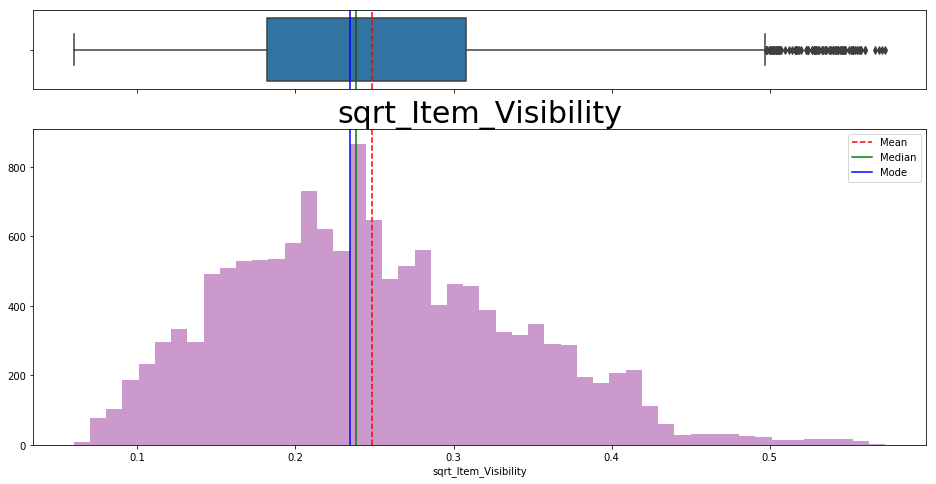

The total skew is :  0.44987109580122425


In [52]:
sqr, sqrt_skew = rt_skew_transform(bigmart_df, "Item_Visibility", 'sqrt')

In [600]:
bigmart_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
test                            0
sqrt_Item_Visibility            0
cbrt_Item_Outlet_Sales       5681
dtype: int64

In [53]:
bigmart_df.drop(["new_outlet"], axis = 1, inplace = True)

#### Notes : 

- As of now, we have imputed all the missing values
- Transformed our variables
- We will not be deleting any outliers, and then will make the model again based on that


This concludes our EDA and data cleaning part. We will now start doing feature engineering, and other stuff which will help us in getting a better model. 

In [54]:
def outlier_iqr (df, colname) : 
    q1, q3 = df[colname].quantile(0.25),df[colname].quantile(0.75) 
    iqr = q3 - q1
    lqr, uqr = q1 - (1.5*iqr), q3 + (1.5*iqr)
    sh = df.loc[(df[colname] < lqr) | (df[colname] > uqr)]
    return lqr, uqr, sh

In [64]:
lqr_sales, uqr_sales, sales_ol = outlier_iqr(bigmart_df, "Item_Outlet_Sales")

In [65]:
lqr_sales, uqr_sales, sales_ol.shape[0]

(-2566.3261, 6501.8699, 186)

In [57]:
lqr_cb_sales, uqr_cb_sales, sales_cb = outlier_iqr(bigmart_df, "cbrt_Item_Outlet_Sales")
lqr_cb_sales, uqr_cb_sales, sales_cb.shape[0]

(1.6599531580220983, 22.336875520663916, 3)

In [69]:
lqr_sq_vis, uqr_sq_vis, sq_vis = outlier_iqr(bigmart_df, "sqrt_Item_Visibility")
lqr_sq_vis, uqr_sq_vis, sq_vis.shape[0]

(-0.00673618257614142, 0.49670263667508485, 103)

In [ ]:
# we will now see, how much of our outliers lie in the test dataset. If a considerable amount is in test dataset, we will not 
# remove those outliers. 

In [70]:
l = [sales_ol, sales_cb, sq_vis]
names = ["sales", "cbrt_sales", "sqrt_vis"]
in_test = [i.loc[i["test"] == 1].shape[0] for i in l]
print(dict(zip(names,in_test)))


{'sales': 0, 'cbrt_sales': 0, 'sqrt_vis': 45}


In [489]:
# we will be deleting the outliers in sales column, but we will leave the outliers in visual column. We would infact scale all
# the other variables. 

In [83]:
bigmart_new = bigmart_df[~((bigmart_df["Item_Outlet_Sales"] < lqr_sales) | (bigmart_df["Item_Outlet_Sales"] > uqr_sales))]

In [84]:
bigmart_df.shape[0] - bigmart_new.shape[0]

186

In [613]:
## Copy file - use if screwed up feature engg

In [85]:
bigmart_new.reset_index(inplace =True)

In [71]:
lqr_sq_vis, uqr_sq_vis, sq_vis = outlier_iqr(bigmart_new, "sqrt_Item_Visibility")
lqr_sq_vis, uqr_sq_vis, sq_vis.shape[0]

(-0.0074479546427002885, 0.4978717596845884, 100)

In [76]:
bigmart_new.iloc[49]['sqrt_Item_Visibility']

0.2603453706137292

In [86]:
bigmart_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14018 entries, 0 to 14017
Data columns (total 16 columns):
index                        14018 non-null int64
Item_Identifier              14018 non-null object
Item_Weight                  14018 non-null float64
Item_Fat_Content             14018 non-null object
Item_Visibility              14018 non-null float64
Item_Type                    14018 non-null object
Item_MRP                     14018 non-null float64
Outlet_Identifier            14018 non-null object
Outlet_Establishment_Year    14018 non-null int64
Outlet_Size                  14018 non-null object
Outlet_Location_Type         14018 non-null object
Outlet_Type                  14018 non-null object
Item_Outlet_Sales            8337 non-null float64
test                         14018 non-null int64
sqrt_Item_Visibility         14018 non-null float64
cbrt_Item_Outlet_Sales       8337 non-null float64
dtypes: float64(6), int64(3), object(7)
memory usage: 1.7+ MB


In [87]:
bigmart_new.drop(["index"], axis = 1, inplace = True)

In [88]:
bigmart_df = bigmart_new.copy()

In [89]:
bigmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14018 entries, 0 to 14017
Data columns (total 15 columns):
Item_Identifier              14018 non-null object
Item_Weight                  14018 non-null float64
Item_Fat_Content             14018 non-null object
Item_Visibility              14018 non-null float64
Item_Type                    14018 non-null object
Item_MRP                     14018 non-null float64
Outlet_Identifier            14018 non-null object
Outlet_Establishment_Year    14018 non-null int64
Outlet_Size                  14018 non-null object
Outlet_Location_Type         14018 non-null object
Outlet_Type                  14018 non-null object
Item_Outlet_Sales            8337 non-null float64
test                         14018 non-null int64
sqrt_Item_Visibility         14018 non-null float64
cbrt_Item_Outlet_Sales       8337 non-null float64
dtypes: float64(6), int64(2), object(7)
memory usage: 1.6+ MB


# Feature Engineering : 

In [615]:
bigmart_df.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.0160473,0.0192782,0.0167601,0.0948105,0.0421896
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,Medium,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


In [90]:
bigmart_df["Item_Category_Broad"] = bigmart_df["Item_Identifier"].apply(lambda x : x[:2])

In [91]:
bigmart_df.loc[bigmart_df["Item_Category_Broad"] == 'NC', "Item_Fat_Content"] = "Non Edible"

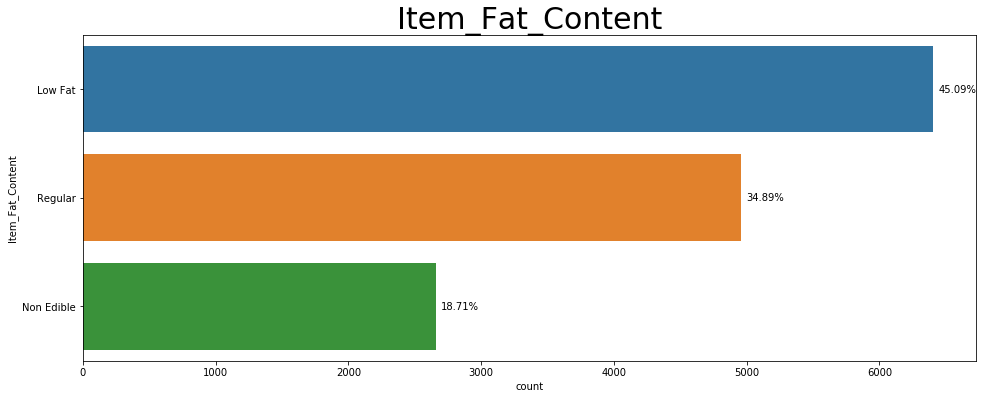

In [92]:
count_plot(bigmart_df, "Item_Fat_Content")

In [93]:
bigmart_df["Item_Category"] = bigmart_df["Item_Identifier"].apply(lambda x : x[:3])

In [94]:
bigmart_df.Item_Category.head()

0    FDA
1    DRC
2    FDN
3    FDX
4    NCD
Name: Item_Category, dtype: object

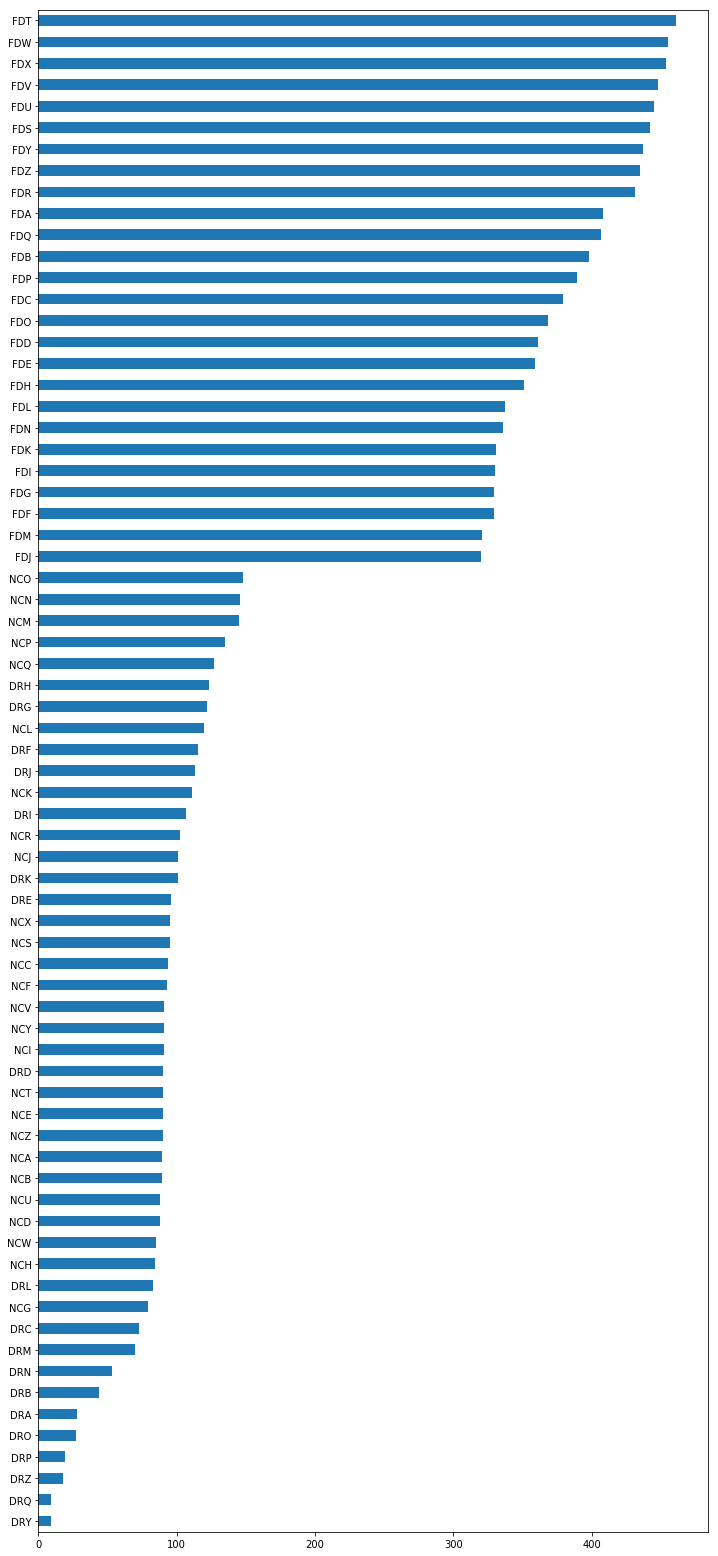

In [95]:
plt.figure(figsize = (12,28))
bigmart_df["Item_Category"].value_counts().sort_values().plot(kind = 'barh')

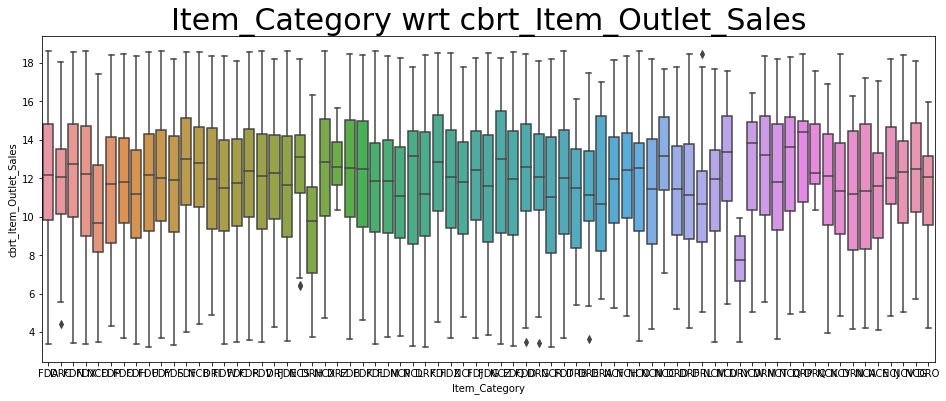

In [624]:
box_plot(bigmart_df, "Item_Category", "cbrt_Item_Outlet_Sales", 'v')

In [96]:
bigmart_df["Item_Num_Cat"] = bigmart_df["Item_Identifier"].apply(lambda x : int(x[-2:]))

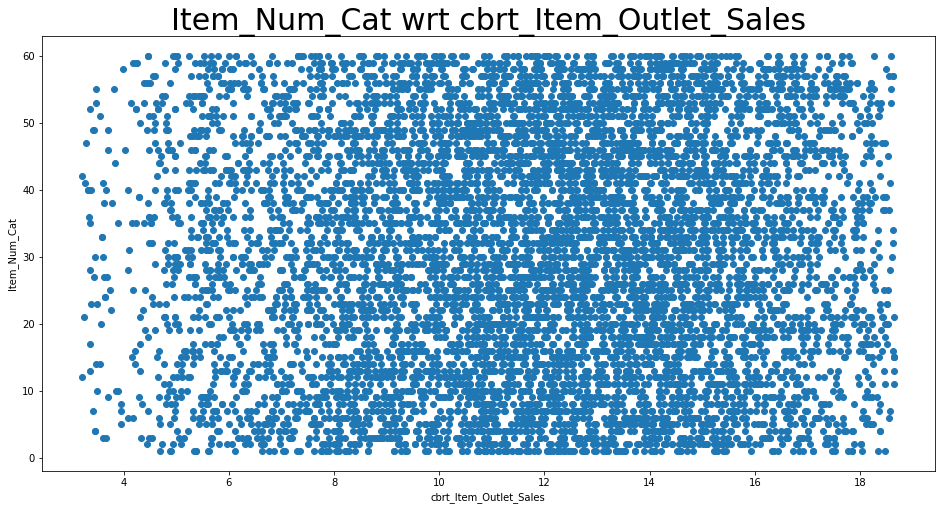

In [97]:
scatter_plot(bigmart_df, "cbrt_Item_Outlet_Sales", "Item_Num_Cat")

In [98]:
bigmart_df.corr().iloc[[4,-2]].T.sort_values(by = "Item_Outlet_Sales", ascending = False)

,Item_Outlet_Sales,cbrt_Item_Outlet_Sales
Item_Outlet_Sales,1.000000,0.953208
cbrt_Item_Outlet_Sales,0.953208,1.000000
Item_MRP,0.553334,0.527465
Item_Num_Cat,0.015579,0.015610
Item_Weight,0.010504,0.007942
Outlet_Establishment_Year,0.007101,0.071206
sqrt_Item_Visibility,-0.129089,-0.171638
Item_Visibility,-0.144184,-0.191186
test,NaN,NaN


In [99]:
def p_value (df, varname, cat_col) : 
    col, pval = [],[]
    for colname in cat_col : 
        col.append(colname)
        s = varname+ "~" + colname
        mod = ols(s, data = df).fit()
        pval.append(round((sm.stats.anova_lm(mod, typ=2)["PR(>F)"][0]),4))
    pval_df = pd.DataFrame(np.column_stack([col, pval]), columns = ['Feature', 'P-Value'])
    return pval_df.sort_values("P-Value").reset_index().drop(["index"], axis = 1)
                

In [100]:
obj.append("Item_Category")
obj.append("Item_Category_Broad")
p_value(bigmart_df, "cbrt_Item_Outlet_Sales", obj[1:])

,Feature,P-Value
0,Outlet_Identifier,0.0
1,Outlet_Size,0.0
2,Outlet_Location_Type,0.0
3,Outlet_Type,0.0
4,Item_Category,0.0
5,Item_Type,0.0011
6,Item_Category_Broad,0.0031
7,Item_Fat_Content,0.2167


In [101]:
bigmart_df["Outlet_Age"] = 2013 - bigmart_df["Outlet_Establishment_Year"]

In [102]:
bigmart_df["Outlet_Age"].describe()

count    14018.000000
mean        15.088315
std          8.335233
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Age, dtype: float64

In [633]:
bigmart_df.corr().iloc[[4,-2]].T.sort_values(by = "Item_Outlet_Sales", ascending = False)

,Item_Outlet_Sales,cbrt_Item_Outlet_Sales
Item_Outlet_Sales,1.000000,0.953208
cbrt_Item_Outlet_Sales,0.953208,1.000000
Item_MRP,0.553334,0.527465
Item_Weight,0.010504,0.007942
Outlet_Establishment_Year,0.007101,0.071206
Outlet_Age,-0.007101,-0.071206
sqrt_Item_Visibility,-0.129089,-0.171638
Item_Visibility,-0.144184,-0.191186
test,NaN,NaN


In [103]:
bigmart_df["Outlet_Age"] = bigmart_df["Outlet_Age"].astype("object")

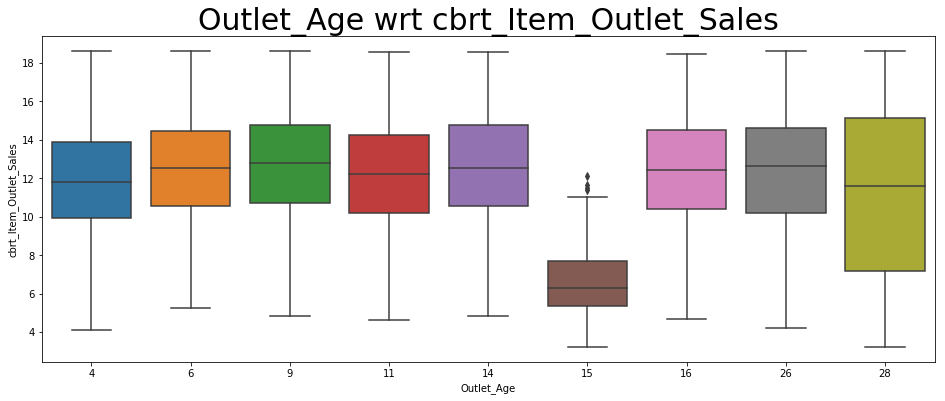

In [104]:
box_plot(bigmart_df, "Outlet_Age", "cbrt_Item_Outlet_Sales", 'v')

In [520]:
p_value(bigmart_df, "cbrt_Item_Outlet_Sales", ["Outlet_Age"])

,Feature,P-Value
0,Outlet_Age,0.0


In [89]:
# Even though there is a weak correlaton between outlet establishment year and item outlet sales, the p-value
# betweeen the outlet age(considered as a cat. variable) and item outlet sales shows that outlate age is significantly related to
# cbrt_item_sales


In [734]:
bigmart_df["Pop_Index"] = 0

In [735]:
a = bigmart_df.groupby(["Item_Identifier"])["Outlet_Identifier"].count().sort_values(ascending = True).reset_index().rename(columns = {"Outlet_Identifier" : "Pop_Index"})

In [736]:
c = 0
for i in a["Item_Identifier"] : 
    m = a.loc[a["Item_Identifier"] == i, "Pop_Index"].values
    #print(int(m))
    bigmart_df.loc[bigmart_df["Item_Identifier"] == i, "Pop_Index"] = int(m)
   

In [737]:
bigmart_df["Pop_Index"].describe()

count    14018.000000
mean         9.065345
std          0.793340
min          6.000000
25%          9.000000
50%          9.000000
75%         10.000000
max         10.000000
Name: Pop_Index, dtype: float64

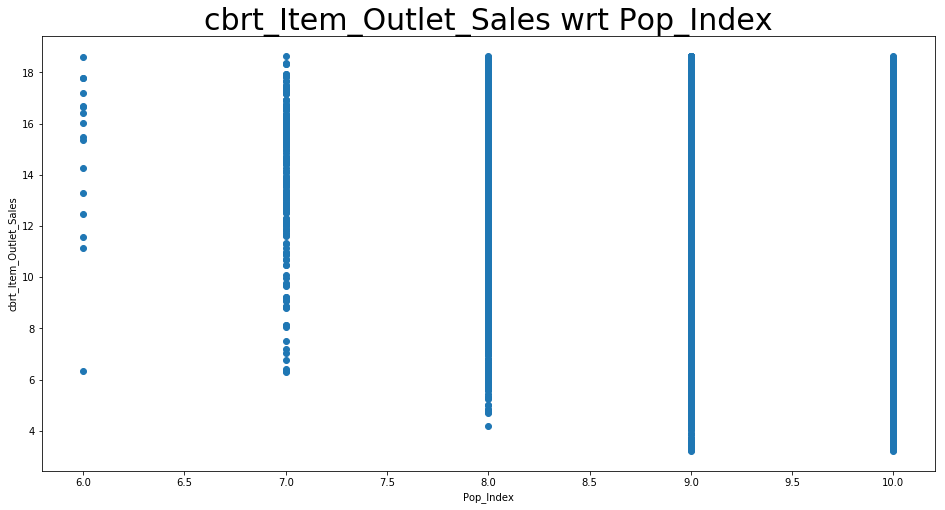

In [525]:
scatter_plot(bigmart_df, "Pop_Index" , "cbrt_Item_Outlet_Sales")

In [120]:
c = bigmart_df.dropna().corr().iloc[[4, -2]].T#.sort_values( by = "Item_Outlet_Sales", ascending = False)
c

,Item_Outlet_Sales,cbrt_Item_Outlet_Sales
Item_Weight,0.013261,0.009858
Item_Visibility,-0.133930,-0.181013
Item_MRP,0.567574,0.551610
Outlet_Establishment_Year,-0.049135,0.030146
Item_Outlet_Sales,1.000000,0.944252
test,NaN,NaN
sqrt_Item_Visibility,-0.117722,-0.160273
cbrt_Item_Outlet_Sales,0.944252,1.000000
Item_Qty,0.759315,0.786715


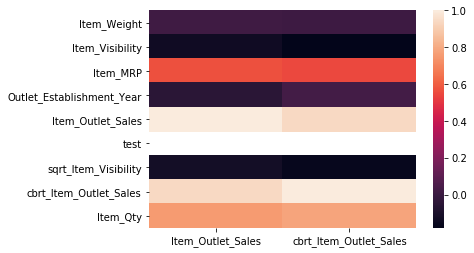

In [121]:
sns.heatmap(c)

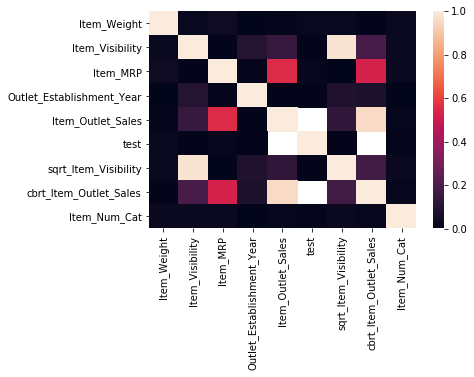

In [105]:
sns.heatmap(abs(bigmart_df.corr()))

In [110]:
from sklearn.cluster import KMeans

In [111]:
km = KMeans(n_clusters=4)

In [122]:
bm_new = bigmart_df[["Item_MRP"]]

In [123]:
km.fit(bm_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [124]:
pred = km.predict(bm_new)

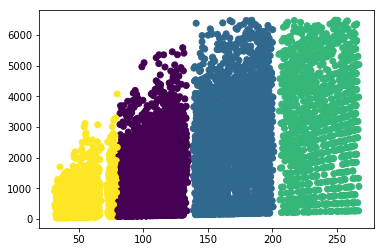

In [125]:
plt.scatter(bigmart_df["Item_MRP"], bigmart_df["Item_Outlet_Sales"], c = pred)

In [126]:
bigmart_df["MRP_Cluster"] = pd.Series(pred)

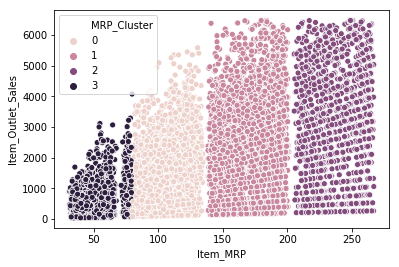

In [127]:
sns.scatterplot(x = "Item_MRP", y = "Item_Outlet_Sales", hue = "MRP_Cluster", data = bigmart_df)

In [128]:
bigmart_final =  bigmart_df.copy()

In [129]:
bigmart_final.isnull().sum().sort_values(ascending = False).head()

cbrt_Item_Outlet_Sales    5681
Item_Outlet_Sales         5681
MRP_Cluster                  0
Outlet_Size                  0
Item_Weight                  0
dtype: int64

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder

In [131]:
bigmart_final.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Non Edible
Item_Visibility,0.0160473,0.0192782,0.0167601,0.0948105,0.0421896
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,Medium,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


In [180]:
#Item Fat Content, Outlet Size, Outlet Type, Item Category, outlet_identifier


# we need to drop outlet_est_year and cbrt_item_outlet_sales, item_visibility

In [132]:
bigmart_final = bigmart_final.drop(["cbrt_Item_Outlet_Sales", "Outlet_Establishment_Year", "Item_Visibility", \
                                  "Item_Category_Broad", "Item_Num_Cat"], axis = 1)

In [133]:
bigmart_final["Outlet"] = bigmart_final["Outlet_Identifier"]


In [134]:
bigmart_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14018 entries, 0 to 14017
Data columns (total 16 columns):
Item_Identifier         14018 non-null object
Item_Weight             14018 non-null float64
Item_Fat_Content        14018 non-null object
Item_Type               14018 non-null object
Item_MRP                14018 non-null float64
Outlet_Identifier       14018 non-null object
Outlet_Size             14018 non-null object
Outlet_Location_Type    14018 non-null object
Outlet_Type             14018 non-null object
Item_Outlet_Sales       8337 non-null float64
test                    14018 non-null int64
sqrt_Item_Visibility    14018 non-null float64
Item_Category           14018 non-null object
Outlet_Age              14018 non-null object
MRP_Cluster             14018 non-null int32
Outlet                  14018 non-null object
dtypes: float64(4), int32(1), int64(1), object(10)
memory usage: 1.7+ MB


In [135]:
cols = ["Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type", "Outlet", "Outlet_Age", "Item_Category", "MRP_Cluster"]

In [137]:
num = bigmart_final.select_dtypes(exclude = "object").columns.tolist()
print(len(num), num)
num.remove('test')
num.remove('Item_Outlet_Sales')
num.remove('MRP_Cluster')
num

6 ['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales', 'test', 'sqrt_Item_Visibility', 'MRP_Cluster']


['Item_Weight', 'Item_MRP', 'sqrt_Item_Visibility']

In [138]:
sc = StandardScaler()

In [139]:
scaled_bigmart = sc.fit_transform(bigmart_final[num])

In [140]:
scaled_bigmart = pd.DataFrame(scaled_bigmart, columns = num)
print(scaled_bigmart.shape)
scaled_bigmart.reset_index(inplace = True)
scaled_bigmart.head()

(14018, 3)


,index,Item_Weight,Item_MRP,sqrt_Item_Visibility
0,0,-0.750142,1.782263,-1.366331
1,1,-1.476679,-1.486333,-1.229836
2,2,1.012462,0.027607,-1.335116
3,3,1.377880,0.684067,0.666668
4,4,-0.829675,-1.395638,-0.483258


In [141]:
scaled_bigmart.isnull().sum()

index                   0
Item_Weight             0
Item_MRP                0
sqrt_Item_Visibility    0
dtype: int64

In [142]:
bigmart_final.drop(num, axis = 1, inplace = True)
bigmart_final.reset_index(inplace = True)
bigmart_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14018 entries, 0 to 14017
Data columns (total 14 columns):
index                   14018 non-null int64
Item_Identifier         14018 non-null object
Item_Fat_Content        14018 non-null object
Item_Type               14018 non-null object
Outlet_Identifier       14018 non-null object
Outlet_Size             14018 non-null object
Outlet_Location_Type    14018 non-null object
Outlet_Type             14018 non-null object
Item_Outlet_Sales       8337 non-null float64
test                    14018 non-null int64
Item_Category           14018 non-null object
Outlet_Age              14018 non-null object
MRP_Cluster             14018 non-null int32
Outlet                  14018 non-null object
dtypes: float64(1), int32(1), int64(2), object(10)
memory usage: 1.4+ MB


In [143]:
final_bigmart = scaled_bigmart.merge(bigmart_final, on = "index")

In [144]:
print(final_bigmart.shape)
final_bigmart.head().T

(14018, 17)


,0,1,2,3,4
index,0,1,2,3,4
Item_Weight,-0.750142,-1.47668,1.01246,1.37788,-0.829675
Item_MRP,1.78226,-1.48633,0.027607,0.684067,-1.39564
sqrt_Item_Visibility,-1.36633,-1.22984,-1.33512,0.666668,-0.483258
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Non Edible
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Size,Medium,Medium,Medium,Medium,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


In [145]:
final_bigmart = pd.get_dummies(final_bigmart, columns = cols)

In [146]:
final_bigmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14018 entries, 0 to 14017
Columns: 129 entries, index to MRP_Cluster_3
dtypes: float64(4), int64(2), object(3), uint8(120)
memory usage: 2.7+ MB


In [147]:
final_bigmart.isnull().sum().sort_values(ascending = False).head()

Item_Outlet_Sales                5681
MRP_Cluster_3                       0
Outlet_Age_9                        0
Outlet_Type_Supermarket Type3       0
Outlet_OUT010                       0
dtype: int64

In [148]:
final_bigmart.shape

(14018, 129)

In [149]:
test_final = final_bigmart.loc[final_bigmart["test"] == 1]
train_final = final_bigmart.loc[final_bigmart["test"] == 0]

In [150]:
test_final.shape, train_final.shape

((5681, 129), (8337, 129))

In [151]:
test_final.drop(["test", "Item_Outlet_Sales", "index"], axis = 1, inplace = True)
train_final.drop(["test", "index"], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [152]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8337 entries, 0 to 8336
Columns: 127 entries, Item_Weight to MRP_Cluster_3
dtypes: float64(4), object(3), uint8(120)
memory usage: 1.5+ MB


In [153]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 8337 to 14017
Columns: 126 entries, Item_Weight to MRP_Cluster_3
dtypes: float64(3), object(3), uint8(120)
memory usage: 976.4+ KB


In [154]:
train_final.isnull().sum().sort_values(ascending = False).head()

MRP_Cluster_3    0
Outlet_Age_11    0
Outlet_OUT010    0
Outlet_OUT013    0
Outlet_OUT017    0
dtype: int64

In [155]:
test_final.isnull().sum().sort_values(ascending = False).head()

MRP_Cluster_3    0
Outlet_Age_14    0
Outlet_OUT013    0
Outlet_OUT017    0
Outlet_OUT018    0
dtype: int64

In [156]:
predictors = train_final.drop([ "Item_Identifier", "Item_Outlet_Sales", "Outlet_Identifier"], axis = 1).columns.tolist()
predictors.remove("Item_Fat_Content")
len(predictors)

123

In [157]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [158]:
IDCol = ["Item_Identifier", "Outlet_Identifier"]
target = "Item_Outlet_Sales"

In [159]:
def model_testing(mod, train_df, test_df, predictors, target, IDCol, filename) : 
    mod.fit(train_df[predictors], train_df[target])
    ypred = mod.predict(train_df[predictors])
    
    cv = cross_validate(mod, train_df[predictors], train_df[target], cv = 20, scoring = "neg_mean_squared_error")
    print("mean cv score is : ", np.sqrt(np.abs(cv['test_score'].mean())))
    print("std cv_score is : ", np.sqrt(np.abs(cv['test_score'].std())))
    print("RMSE is : ", np.sqrt(np.abs(metrics.mean_squared_error(train_df[target], ypred))))
    
    
    test_df[target] = mod.predict(test_df[predictors])
    #test_df["Item_Outlet_Sales"] = test_df[target].apply(lambda x : x**3)
    
    IDCol.append("Item_Outlet_Sales")
   # print(IDCol)
    file = pd.DataFrame({ x: test_df[x] for x in IDCol})
    file.to_csv(filename, index=False)

In [160]:
lr = LinearRegression()

In [161]:
model_testing(lr, train_final, test_final, predictors, target, IDCol, "linear_reg_new.csv")

mean cv score is :  1009.5486307227043
std cv_score is :  263.5564870320857
RMSE is :  996.968902365843


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


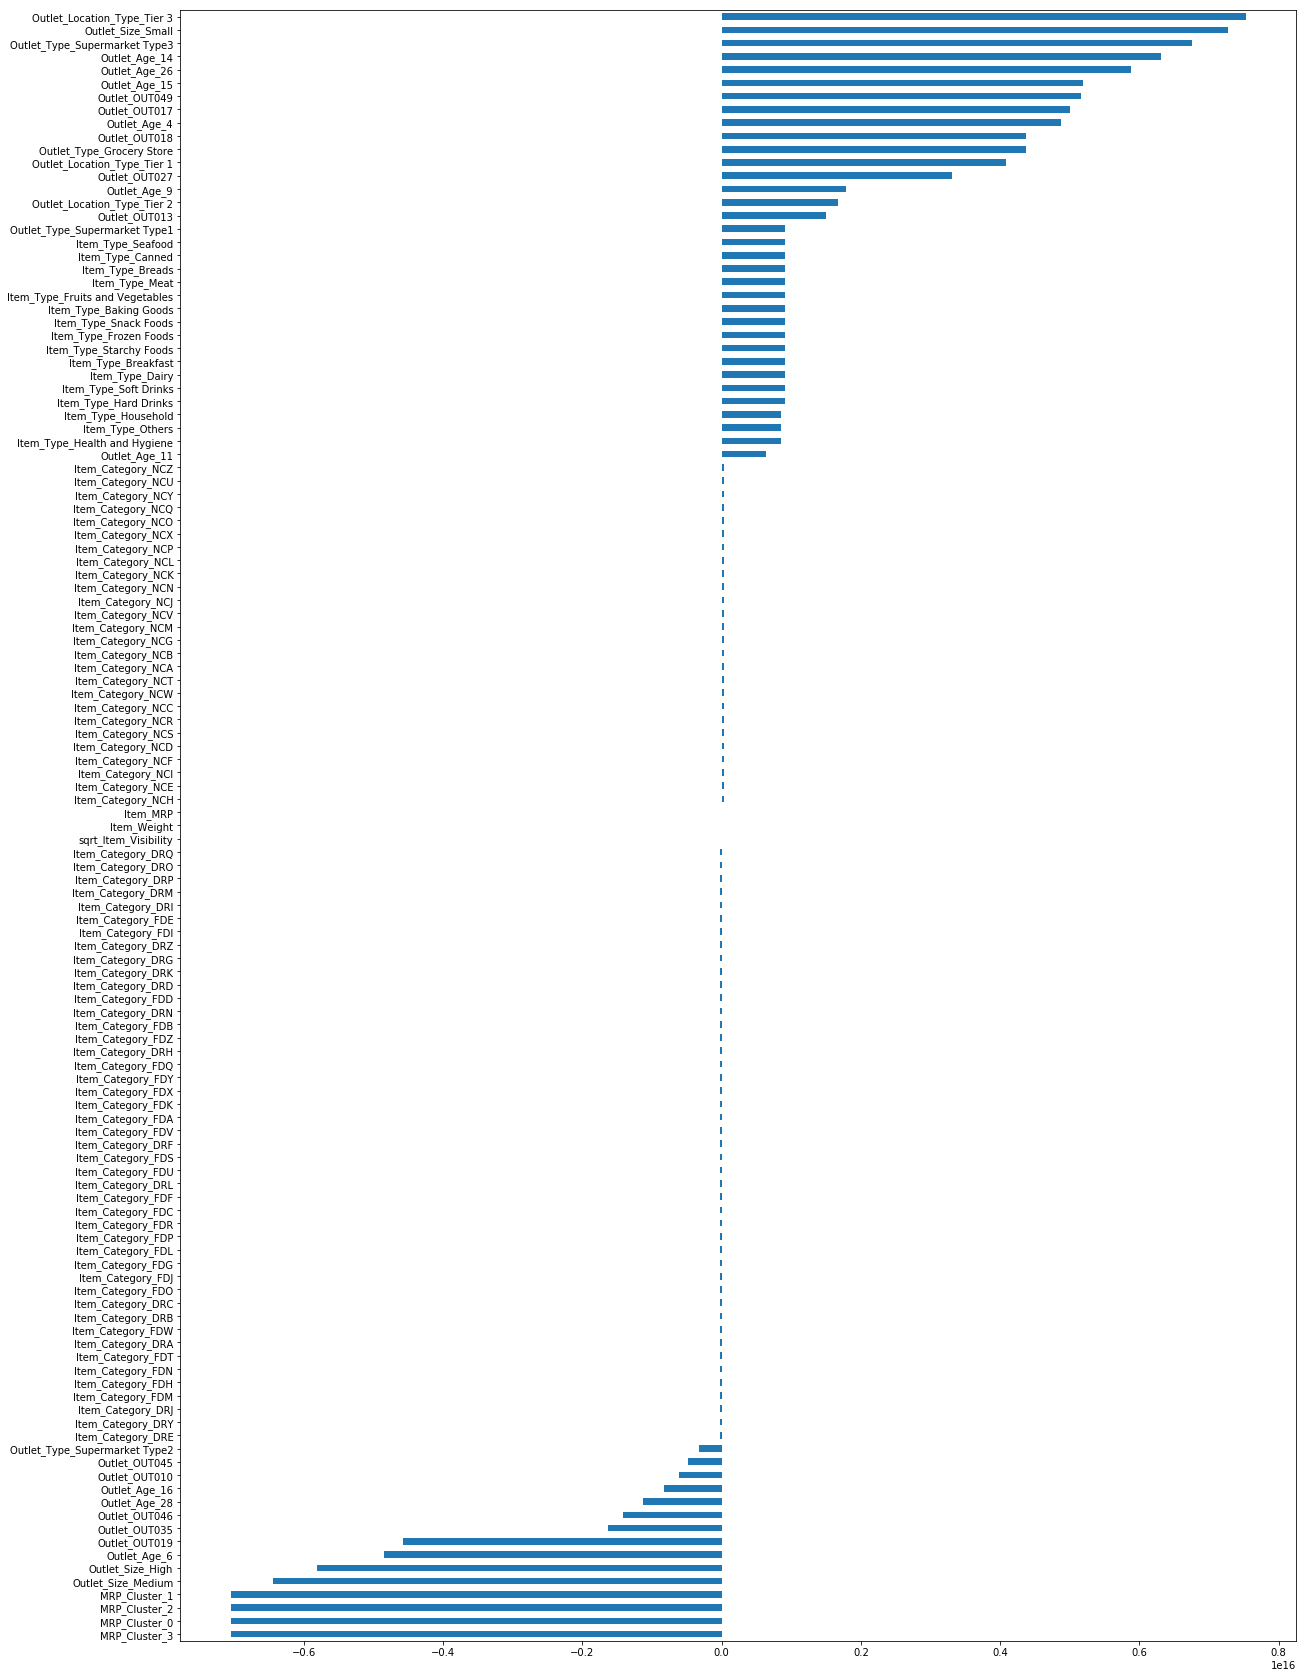

In [162]:
plt.figure(figsize = (20, 30))
pd.Series(lr.coef_, predictors).sort_values().plot(kind = 'barh')

In [163]:
ls = Lasso()

In [164]:
model_testing(ls, train_final, test_final, predictors, target, IDCol, "lasso_new.csv")

mean cv score is :  1004.3776018746572
std cv_score is :  259.06521288717556
RMSE is :  998.9968538035209


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


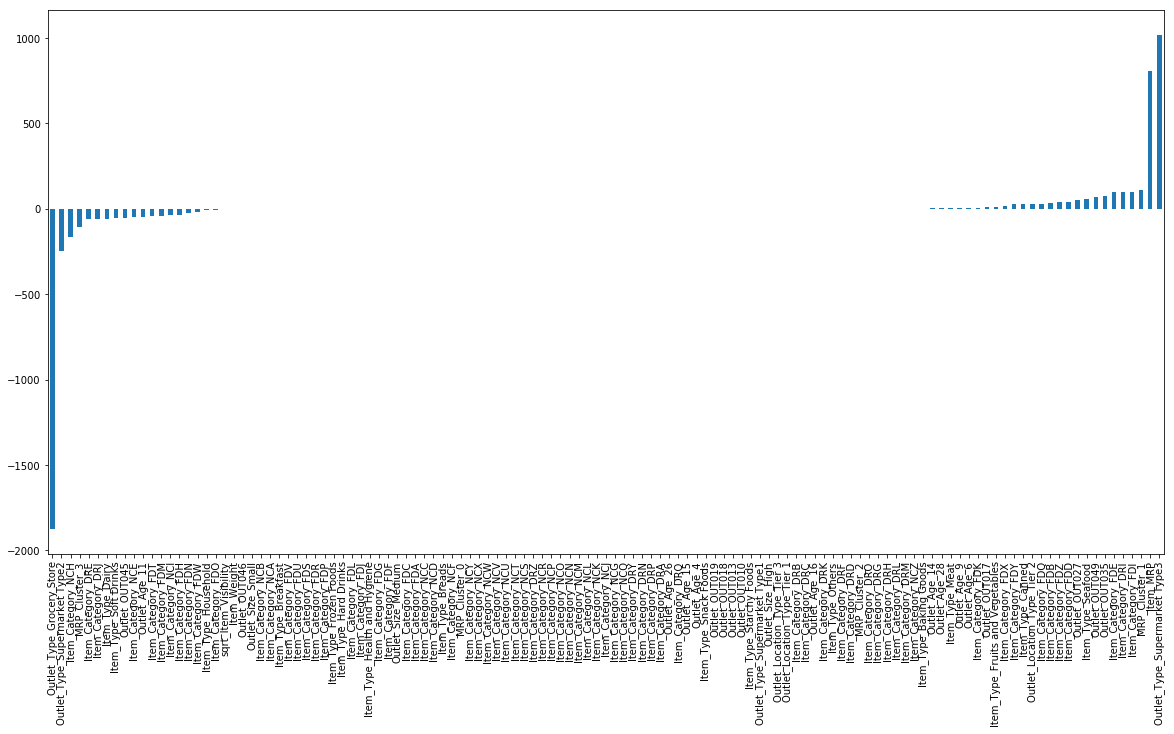

In [165]:
plt.figure(figsize = (20, 10))
pd.Series(ls.coef_, predictors).sort_values().plot(kind = 'bar')

In [259]:
rd = Ridge()

In [806]:
model_testing(rd, train_final, test_final, predictors, target, IDCol, "ridge_new.csv")

mean cv score is :  1010.2891051683345
std cv_score is :  260.0365409405861
RMSE is :  998.1556168447075


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


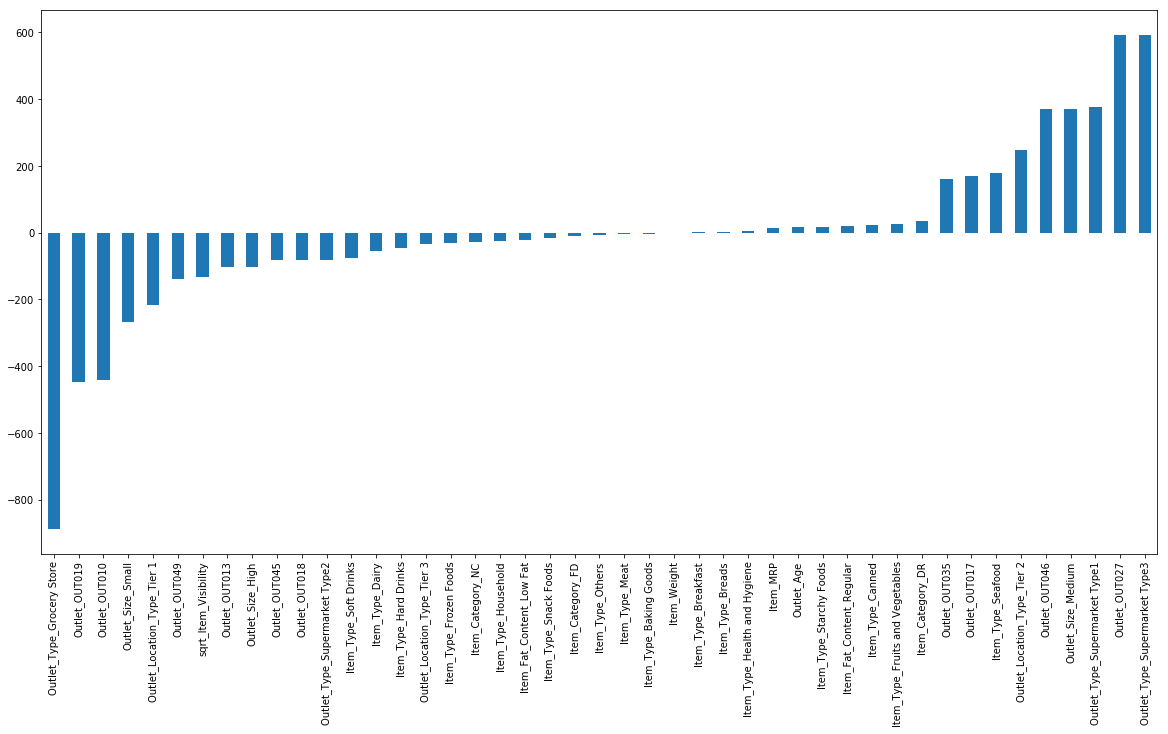

In [263]:
plt.figure(figsize = (20, 10))
pd.Series(rd.coef_, predictors).sort_values().plot(kind = 'bar')

In [166]:
from sklearn.ensemble import RandomForestRegressor

In [167]:
rf = RandomForestRegressor(n_estimators = 20,min_samples_leaf= 5)

In [168]:
model_testing(rf, train_final, test_final, predictors, target, IDCol, "random_forest_scaled.csv")

mean cv score is :  1004.2771295389682
std cv_score is :  264.14779943466397
RMSE is :  720.860240418781


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
